---

# **CAPSTONE PROJECT MODUL 3 - Predicting Hotel Booking Cancellation (Klasifikasi)**
### Dataset: Hotel Booking Demand
### Author: Liswatun Naimah

---

## Project Overview

Proyek ini bertujuan membangun model klasifikasi untuk memprediksi apakah reservasi hotel akan dibatalkan (`is_canceled`). Dataset berisi data pemesanan hotel di Portugal, mencakup informasi negara asal tamu, channel pemesanan, tipe pelanggan, hingga permintaan khusus. Model ini diharapkan membantu manajemen hotel dalam mengambil tindakan preventif untuk menurunkan potensi pembatalan dan kerugian operasional maupun finansial.

---

## Business Understanding

### 1. Stakeholder

- **Primary:** Tim Manajemen Hotel  
- **Secondary:** Tim Revenue Management, Tim Customer Experience, dan Tim Marketing

### 2. Masalah Bisnis

Tingginya angka **booking cancellation** berdampak pada:
- Kerugian pendapatan (_loss of revenue_)
- Perencanaan kamar dan staf yang tidak optimal
- Gangguan operasional akibat pembatalan mendadak

### 3. Tujuan Bisnis

Membangun sistem prediktif untuk:
- Mengidentifikasi booking yang berisiko tinggi batal
- Memberikan peringatan dini kepada tim internal
- Mengoptimalkan alokasi kamar dan strategi promosi

### 4. Dampak Bisnis

- **Cost Saving:** Menghindari kerugian dari kamar kosong yang tidak terantisipasi  
- **Operational Efficiency:** Penjadwalan staf dan kamar yang lebih efektif  
- **Customer Retention:** Promosi lebih tepat sasaran pada tamu rawan cancel

---

## Problem Conversion to Machine Learning

### Business Question

> Bagaimana memprediksi apakah seorang tamu akan membatalkan pemesanannya?

### ML Formulation

- **Input:** Informasi pemesanan tamu (asal negara, tipe deposit, permintaan khusus, dll)
- **Output:** Probabilitas dan label klasifikasi (`0` = tidak batal, `1` = batal)
- **Model Type:** Classification
- **Approach:** Supervised Learning

---

## Evaluation Strategy & Metrics

### Confusion Matrix

| Actual \ Predicted | Negative (N)         | Positive (P)               |
|--------------------|----------------------|----------------------------|
| **Negative (-)**   | True Negative (TN) | False Positive (FP) <br> *Type I Error* |
| **Positive (+)**   | False Negative (FN) <br> *Type II Error* | True Positive (TP)       |

---

### Penjelasan Error Type

- **False Positive (FP):**  
  Prediksi akan batal, tapi kenyataannya tidak → menyebabkan **promosi tidak perlu** diberikan → **biaya operasional terbuang**.

- **False Negative (FN):**  
  Prediksi tidak batal, tapi ternyata batal → menyebabkan **kamar kosong mendadak** dan **kehilangan pendapatan** → **lebih berisiko secara bisnis**.

---

### Strategi Evaluasi

- Fokus utama adalah **Recall pada kelas 1**, karena False Negative lebih berdampak ke revenue.
- **F1 Score** digunakan untuk menjaga keseimbangan antara Recall dan Precision (menghindari false alarm).
- **PR Curve** menjadi visualisasi utama karena data **terindikasi imbalance** (63% vs 37%).
- **ROC AUC** hanya sebagai pelengkap, karena bisa menyesatkan saat imbalance.

---

### Metrik yang Digunakan

| Metrik       | Fungsi                                                                 |
|--------------|------------------------------------------------------------------------|
| **Recall**   | Menangkap sebanyak mungkin reservasi yang berpotensi dibatalkan        |
| **Precision**| Memastikan prediksi pembatalan memang benar-benar batal               |
| **F1 Score** | Menyeimbangkan recall dan precision untuk mencegah false alarm         |
| **PR Curve** | Visualisasi terbaik untuk kasus imbalance seperti ini                  |
| **ROC AUC**  | Digunakan hanya sebagai pelengkap, bukan metrik utama                  |

> **F1 Score dan PR Curve** dipilih karena:
> - Menjaga keseimbangan antara deteksi pembatalan dan beban promosi
> - Relevan dengan dampak bisnis dan kondisi dataset yang imbalance

---

## Dataset Description

- **Nama Dataset:** Hotel Booking Demand  
- **Sumber:** Pemesanan hotel berbasis di Portugal  
- **Jumlah Observasi:** 83.573 baris  
- **Jumlah Fitur (sebelum feature engineering):** 11 fitur  
- **Target Variabel:** `is_canceled` (`0` = tidak batal, `1` = batal)

### Fitur Numerik
- `previous_cancellations`
- `booking_changes`
- `days_in_waiting_list`
- `required_car_parking_spaces`
- `total_of_special_requests`

### Fitur Kategorikal
- `country`
- `market_segment`
- `deposit_type`
- `customer_type`
- `reserved_room_type`

---

## Business Expectation from Model

- **Recall ≥ 80%** → untuk mendeteksi mayoritas pembatalan
- **Explainability** → melalui SHAP dan LIME untuk transparansi ke stakeholder
- **Integration-ready** → model bisa digunakan di CRM atau sistem booking hotel
- **Actionable Insight** → bantu tim ops dan marketing melakukan tindakan mitigasi

---

## Limitasi Model

- **Observasi terbatas:** model hanya belajar dari data historis  
  → tidak bisa prediksi akurat untuk pola booking baru yang belum pernah ada
- **Distribusi fitur:** model bisa gagal pada **negara, deposit type, atau customer type** baru
- **Kinerja Metrik:** karena dataset imbalance, **ROC AUC bisa menyesatkan**  
  → lebih baik gunakan **PR Curve**
- **Multicollinearity:** jika menggunakan Logistic Regression, perlu penalti  
  → gunakan `LogisticRegression(penalty='l1')` atau `'l2'` untuk mengurangi risiko korelasi tinggi antar fitur


## **Data Understanding, Cleaning & Preparation**

## Import Library

In [30]:
# =========================
# Basic Data Handling
# =========================
import pandas as pd
import numpy as np

# =========================
# Data Visualization
# =========================
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from IPython.display import display

# =========================
# Preprocessing & Feature Engineering
# =========================
from sklearn.model_selection import (
    train_test_split, StratifiedKFold, 
    cross_val_score, cross_validate
)
from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, RobustScaler,
    LabelEncoder, OneHotEncoder, OrdinalEncoder
)
from sklearn.impute import (
    SimpleImputer, KNNImputer
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from category_encoders import BinaryEncoder
from sklearn.preprocessing import KBinsDiscretizer

# =========================
# Feature Selection
# =========================
from sklearn.feature_selection import (
    SelectKBest, chi2, f_classif, RFE
)

# =========================
# Machine Learning Models (Classification)
# =========================
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier,
    GradientBoostingClassifier, VotingClassifier,
    BaggingClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# =========================
# Model Selection & Hyperparameter Tuning
# =========================
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# =========================
# Evaluation Metrics
# =========================
from sklearn.metrics import (
    classification_report, confusion_matrix,
    accuracy_score, recall_score, precision_score, f1_score,
    roc_auc_score, roc_curve,
    precision_recall_curve, average_precision_score,
    make_scorer, fbeta_score
)

# =========================
# Imbalanced Classification
# =========================
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

# =========================
# Explainable Machine Learning
# =========================
import shap
import lime
import lime.lime_tabular

# =========================
# Statistical Diagnostics
# =========================
from statsmodels.stats.outliers_influence import variance_inflation_factor

# =========================
# System & Configuration
# =========================
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)


## **Load Dataset & Duplikasi**

Di tahap ini, dataset dipisahkan menjadi dua bagian untuk menjaga keutuhan data asli:

- `df_raw` menyimpan data mentah yang **tidak akan diubah**, digunakan sebagai referensi jika perlu membandingkan kondisi awal.
- `df` adalah salinan dari `df_raw` yang akan digunakan untuk **semua proses lanjutan**, mulai dari data cleaning, eksplorasi, feature engineering, modeling, hingga evaluasi.

### Tujuan Pemisahan:
Agar proses analisis tetap **rapi dan aman**. Jika sewaktu-waktu terjadi kesalahan dalam transformasi data, kita bisa kembali melihat data awal melalui `df_raw` tanpa harus load ulang CSV.

### Penggunaan:
- `df_raw` → dipakai untuk data understanding awal (preview, struktur, missing value, dsb)
- `df` → dipakai untuk **seluruh tahap lanjutan** (cleaning → modeling → evaluasi)


In [31]:
# =========================
# Load Dataset & Duplikasi
# =========================

# Data mentah (backup, tidak diubah-ubah)
df_raw = pd.read_csv('data_hotel_booking_demand.csv')

# Data kerja (untuk proses cleaning, EDA, modeling, dll)
df = df_raw.copy()

# Tampilkan 5 baris pertama dari data kerja
df.head()


,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


### Interpretasi Singkat Output (Preview Data)
- `is_canceled`: target klasifikasi → 0 = booking jadi, 1 = booking dibatalkan
- `country`: asal negara pelanggan
- `market_segment`: saluran pemesanan (online TA, offline TA/TO, direct, dll)
- `deposit_type`: tipe deposit (No Deposit, Non Refund, dll)
- `customer_type`: jenis pelanggan (Transient, Contract, Group, Transient-Party)
- `total_of_special_requests`: jumlah permintaan tambahan (misal: high floor, bed tambahan)
- `reserved_room_type`: tipe kamar yang dipesan
- `required_car_parking_spaces`: kebutuhan tempat parkir mobil

---

## **Struktur Dataset (Eksplorasi Awal dengan `df_raw`)**

### Tujuan Tahap Ini:
- Mengetahui ukuran dataset (jumlah baris & kolom)
- Melihat tipe data dan informasi null per kolom
- Menampilkan ringkasan statistik fitur numerik
- Mengidentifikasi jumlah nilai unik di tiap kolom (baik numerik maupun kategorikal)

Eksplorasi awal dilakukan menggunakan `df_raw` karena kita ingin melihat kondisi asli dataset **sebelum dilakukan proses cleaning**.


In [32]:
# =========================
# Struktur Dataset (Eksplorasi Awal)
# =========================

# Dimensi dataset
print(f"Jumlah baris: {df_raw.shape[0]}")
print(f"Jumlah kolom: {df_raw.shape[1]}")

# Informasi tipe data dan null
df_raw.info()

# Statistik deskriptif fitur numerik
display(df_raw.describe().T)

# Jumlah nilai unik per kolom
display(df_raw.nunique().sort_values())


Jumlah baris: 83573
Jumlah kolom: 11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


,count,mean,std,min,25%,50%,75%,max
previous_cancellations,83573.0,0.086798,0.841011,0.0,0.0,0.0,0.0,26.0
booking_changes,83573.0,0.220897,0.648635,0.0,0.0,0.0,0.0,21.0
days_in_waiting_list,83573.0,2.330561,17.673051,0.0,0.0,0.0,0.0,391.0
required_car_parking_spaces,83573.0,0.062999,0.246919,0.0,0.0,0.0,0.0,8.0
total_of_special_requests,83573.0,0.573211,0.795163,0.0,0.0,0.0,1.0,5.0
is_canceled,83573.0,0.368277,0.482340,0.0,0.0,0.0,1.0,1.0


is_canceled                      2
deposit_type                     3
customer_type                    4
required_car_parking_spaces      5
total_of_special_requests        6
market_segment                   8
reserved_room_type              10
previous_cancellations          15
booking_changes                 19
days_in_waiting_list           115
country                        162
dtype: int64

### Insight dari Output:

- **Jumlah data:** 83.573 baris dan 11 kolom
- **Tipe data:** terdapat 6 kolom numerik (`int64`) dan 5 kolom kategorikal (`object`)
- **Missing value:** hanya terdapat pada kolom `country` sebanyak 351 data yang hilang (83.222 non-null dari total 83.573)
- **Kolom kategorikal:** `country`, `market_segment`, `deposit_type`, `customer_type`, `reserved_room_type`
- **Kolom numerikal penting:** 
  - `booking_changes`, `days_in_waiting_list`, dan `previous_cancellations` punya nilai maksimum yang tinggi → indikasi potensi outlier
  - `required_car_parking_spaces` dan `total_of_special_requests` memiliki rentang nilai terbatas, dominan di 0 → bisa dicek distribusinya nanti
- **Jumlah nilai unik per kolom:**
  - `country`: 162 → sangat banyak → kemungkinan besar perlu grouping
  - `days_in_waiting_list`: 115 → distribusi perlu divisualisasi
  - Beberapa fitur seperti `deposit_type`, `customer_type`, `is_canceled` hanya memiliki sedikit nilai unik → cocok untuk encoding

---

Informasi ini penting sebagai dasar untuk menentukan strategi cleaning (handling missing, outlier), encoding, dan eksplorasi visual selanjutnya.


## Identifikasi Tipe Fitur

### Tujuan Tahap Ini:
- Memisahkan fitur **numerikal** dan **kategorikal**
- Supaya proses **preprocessing** (seperti scaling untuk numerik, encoding untuk kategorik) bisa dilakukan dengan lebih rapi dan efisien
- Ini juga berguna nanti saat membuat pipeline machine learning (misalnya pakai `ColumnTransformer`)

---

### Hasil:
- Fitur **numerikal** akan digunakan untuk scaling atau deteksi outlier
- Fitur **kategorikal** akan digunakan untuk encoding (ordinal, one-hot, atau binary tergantung konteks dan jumlah kategorinya)


In [33]:
# =========================
# Identifikasi Tipe Fitur
# =========================

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include='object').columns.tolist()

print("Fitur Numerikal:", numerical_features)
print("Fitur Kategorikal:", categorical_features)


Fitur Numerikal: ['previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests', 'is_canceled']
Fitur Kategorikal: ['country', 'market_segment', 'deposit_type', 'customer_type', 'reserved_room_type']


### Interpretasi Output Sementara:

#### **Fitur Numerikal:**
- Terdiri dari 6 kolom:  
  `previous_cancellations`, `booking_changes`, `days_in_waiting_list`, `required_car_parking_spaces`, `total_of_special_requests`, `is_canceled`
- Kolom-kolom ini bertipe numerik (`int64`) dan nantinya akan digunakan untuk proses **scaling**, **deteksi outlier**, atau **feature engineering**
- Kolom `is_canceled` meskipun numerik, **fungsi utamanya sebagai target klasifikasi** (bukan di-scaling, tapi dipisahkan saat modeling)

#### **Fitur Kategorikal:**
- Terdiri dari 5 kolom:  
  `country`, `market_segment`, `deposit_type`, `customer_type`, `reserved_room_type`
- Semua kolom ini perlu di-**encode** sebelum bisa digunakan ke model
- Kolom `country` memiliki **kategori yang sangat banyak** (162 negara) → kemungkinan besar perlu disederhanakan (misalnya: grouping top X + "other")

---

Identifikasi ini sangat penting untuk membantu menentukan strategi **preprocessing** dan membangun pipeline machine learning yang efisien.


## Cek Missing Value

### Tujuan Tahap Ini:
- Untuk mengidentifikasi kolom mana yang memiliki nilai kosong (missing)
- Missing value perlu ditangani karena bisa menyebabkan error atau hasil model yang bias
- Visualisasi akan membantu melihat pola missing secara lebih intuitif dan informatif

---

### Metode yang Digunakan:
1. **Tabel jumlah missing value per kolom**
2. **Barplot jumlah missing**
3. **Matrix plot pola distribusi missing**
4. **Heatmap korelasi antar missing**
5. **Dendrogram untuk klasterisasi pola missing antar fitur**


#### **Jumlah Missing Value per Kolom**

In [34]:
# =========================
# Jumlah Missing Value per Kolom
# =========================
missing_values = df_raw.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]
print("Jumlah Missing Value per Fitur:")
display(missing_values)


Jumlah Missing Value per Fitur:


country    351
dtype: int64

### Interpretasi Jumlah Missing Value

- Hanya terdapat **1 kolom** yang memiliki missing value, yaitu `country`
- Total nilai yang hilang sebanyak **351 baris**
- Dengan total data sebanyak 83.573 observasi, proporsi missing value hanya sekitar **0.4%**
- Jumlah ini tergolong sangat kecil dan **tidak signifikan secara statistik**
- Namun, fitur `country` bersifat **kategorikal** dan memiliki potensi informasi penting dalam model (misalnya pengaruh lokasi terhadap risiko pembatalan)

### Rekomendasi Penanganan Missing Value

- Karena proporsinya kecil dan `country` adalah fitur kategorikal, **tidak diperlukan imputasi kompleks**
- Disarankan untuk melakukan **imputasi menggunakan kategori baru seperti `'Unknown'`** agar tidak membuang data
- Hal ini menjaga struktur data tetap utuh dan memungkinkan kategori `'Unknown'` dianalisis secara terpisah dalam proses modeling

### Kesimpulan

Missing value pada `country` akan ditangani dengan pendekatan **imputasi label `'Unknown'`**, karena:
- Proporsi missing sangat kecil (0.4%)
- Data tidak perlu dihapus
- Fitur `country` berpotensi relevan secara bisnis dan analitik


#### **Bar Plot Missing Value**

Barplot Missing Value


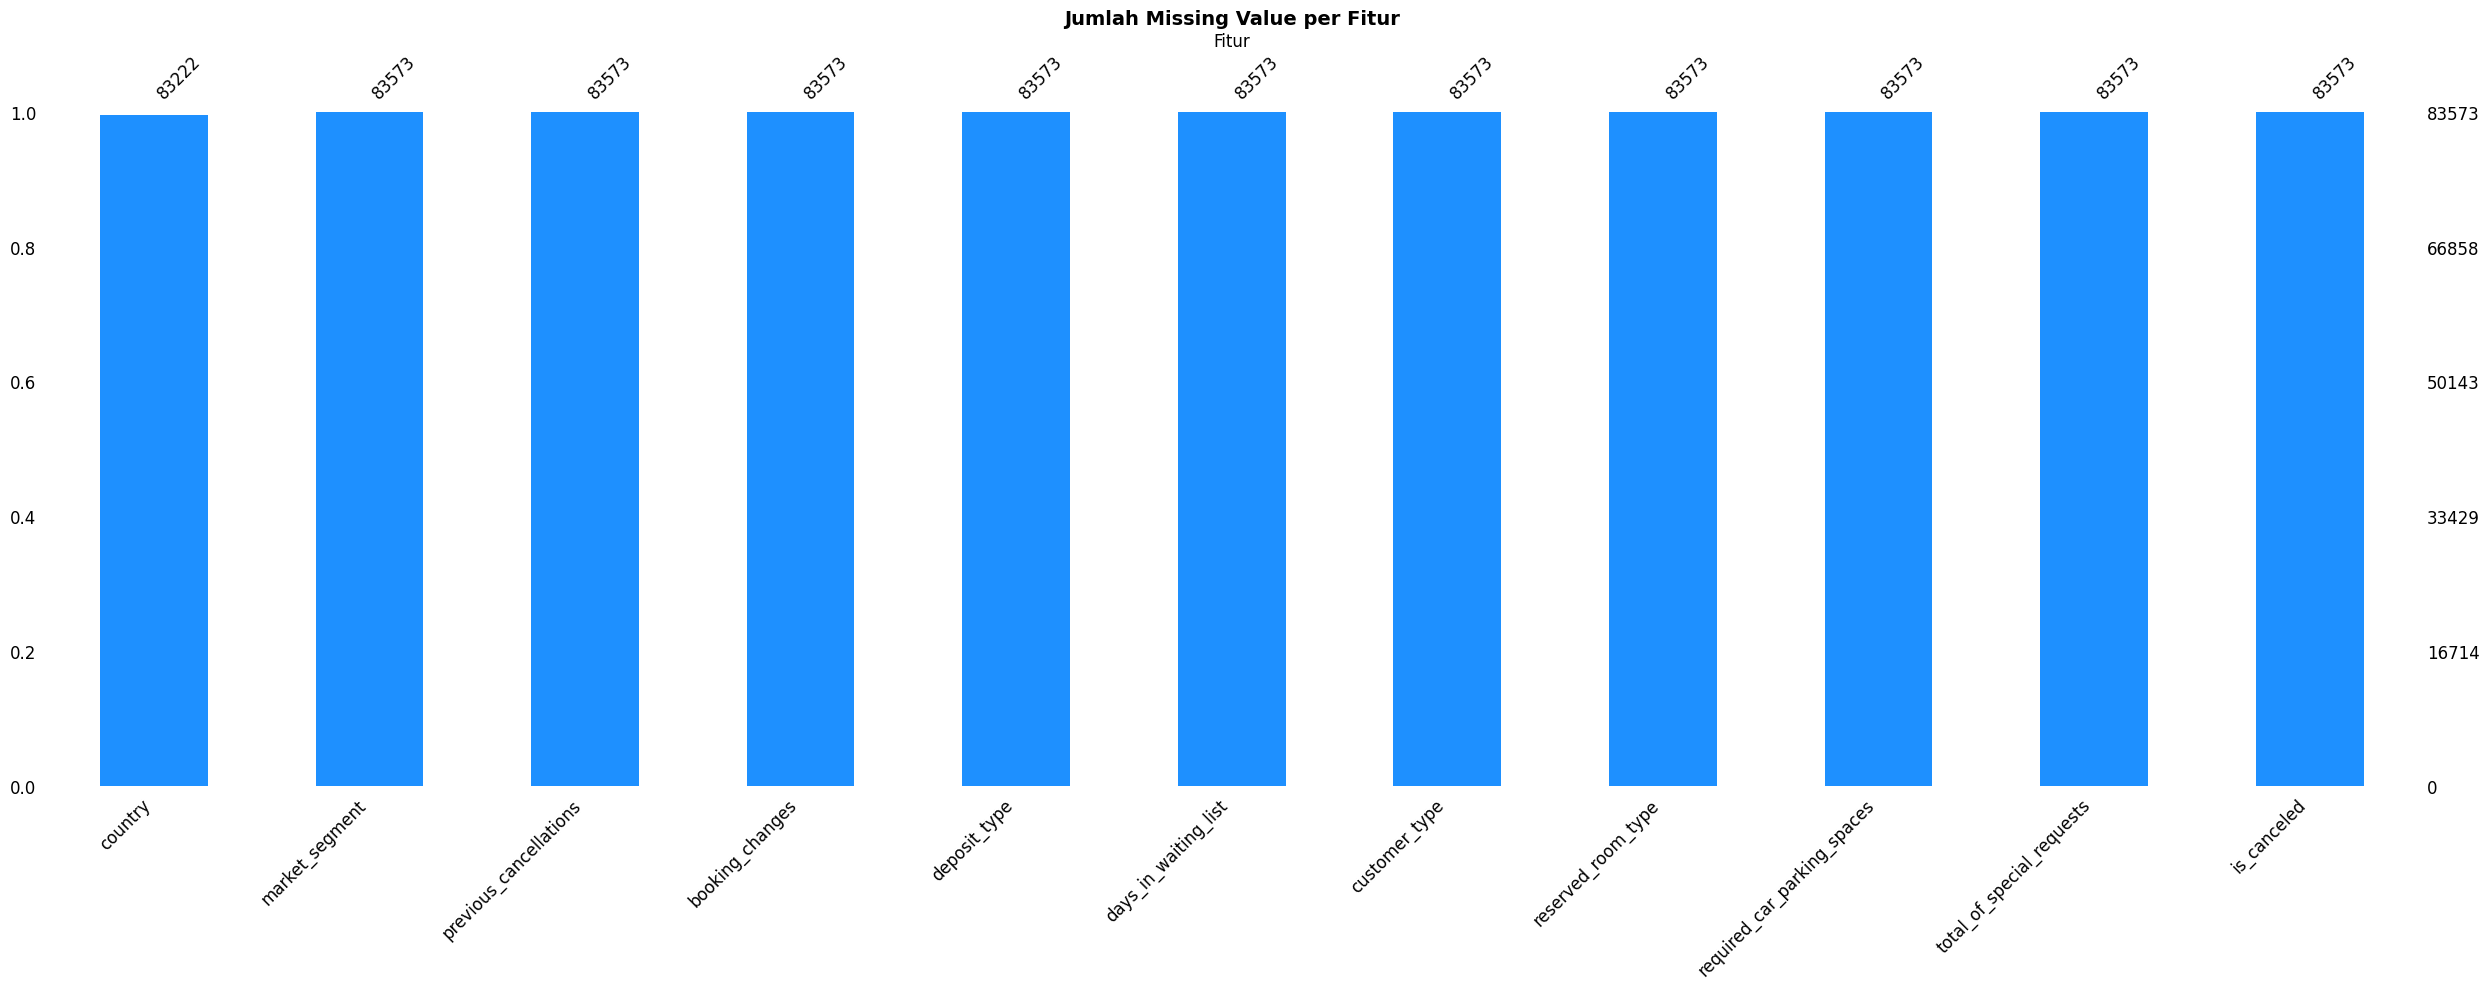

In [35]:
# =========================
# Barplot Missing Value
# =========================
print("Barplot Missing Value")
plt.figure(figsize=(10, 5))
msno.bar(
    df_raw,
    color="dodgerblue",
    sort="ascending",
    fontsize=12
)
plt.title("Jumlah Missing Value per Fitur", fontsize=14, weight='bold')
plt.xlabel("Fitur", fontsize=12)
plt.ylabel("Jumlah Missing", fontsize=12)
plt.tight_layout()
plt.show()


### Interpretasi Barplot Missing Value

Barplot ini digunakan untuk melihat jumlah data yang hilang (missing value) pada setiap kolom secara visual.

#### Insight:
- Hanya terdapat **satu kolom** yang memiliki missing value, yaitu `country`.
- Kolom `country` memiliki **351 baris data kosong** dari total **83.573 baris**, atau sekitar **0.4%** dari total data.
- Kolom lainnya **tidak memiliki missing value sama sekali**, yang berarti data relatif bersih dan siap untuk tahap preprocessing selanjutnya.

#### Kesimpulan & Tindakan:
- Karena hanya 1 kolom yang terkena dan proporsinya kecil, maka **tidak perlu diterapkan metode imputasi yang kompleks**.
- Namun, karena `country` merupakan fitur kategorikal yang berpotensi penting untuk segmentasi atau analisis perilaku tamu berdasarkan wilayah, maka:

**Rekomendasi Penanganan:**
- **Opsi utama :** Imputasi dengan label `'Unknown'`  
  Menjaga jumlah data tetap utuh dan bisa dianalisis sebagai kategori tersendiri.

> Langkah ini memastikan bahwa penanganan missing value dilakukan dengan tetap mempertimbangkan konteks bisnis dan relevansi fitur.


#### **Matrix Plot Missing Value (Missingno)**


Matrix Plot Missing Value


<Figure size 1000x500 with 0 Axes>

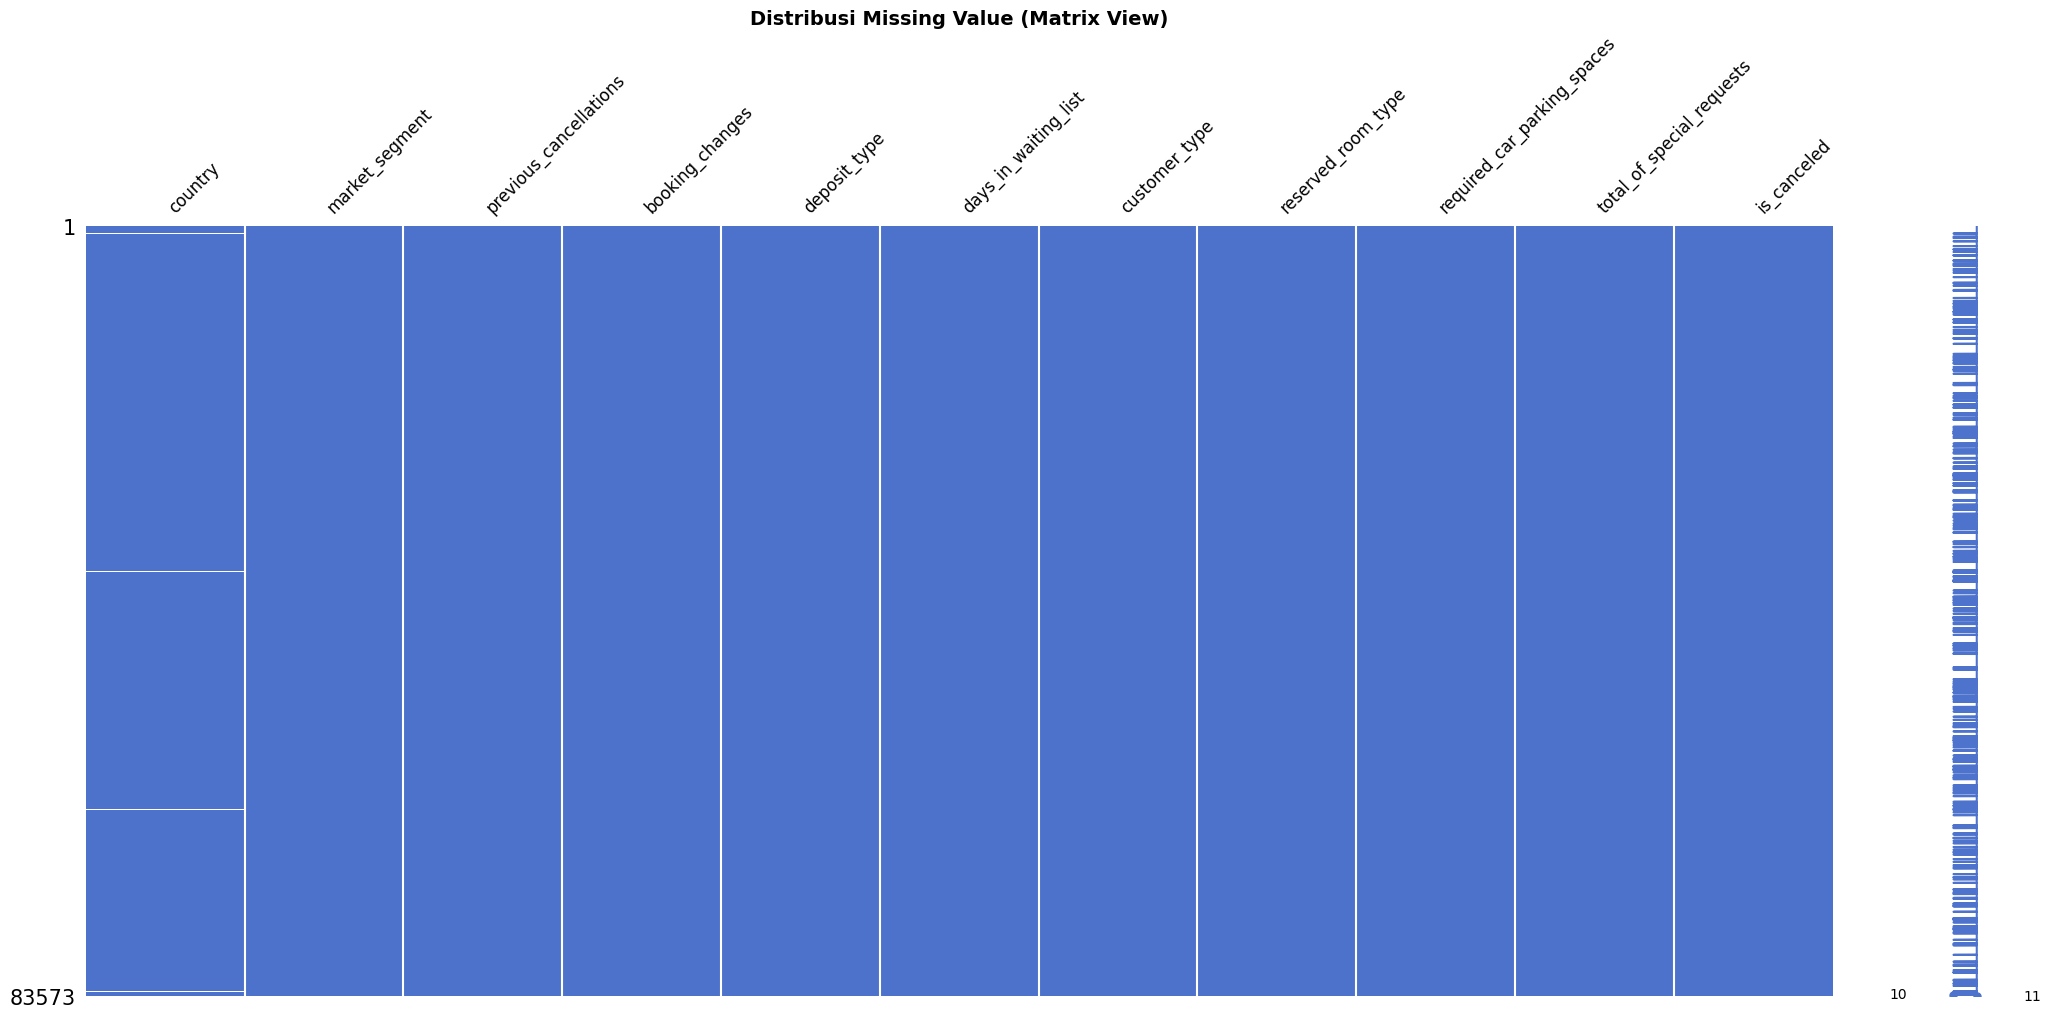

In [36]:
# =========================
# Matrix Plot Missing Value
# =========================
print("Matrix Plot Missing Value")
plt.figure(figsize=(10, 5))
msno.matrix(
    df_raw,
    color=(0.3, 0.45, 0.8),
    fontsize=12
)
plt.title("Distribusi Missing Value (Matrix View)", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


### Interpretasi Matrix Plot Missing Value

Matrix plot digunakan untuk melihat distribusi dan pola missing value secara visual di seluruh baris data.

#### Insight:
- Hanya kolom `country` yang menunjukkan garis vertikal terang, menandakan adanya missing value.
- Semua kolom lainnya tidak memiliki missing value (ditunjukkan dengan blok biru penuh).
- Missing value pada `country` terlihat **tersebar secara acak** di sepanjang dataset, **tidak terkonsentrasi pada segmen tertentu**.

#### Kesimpulan:
- Tidak ditemukan pola sistematis atau grup data tertentu yang dominan memiliki missing value.
- Oleh karena itu, penanganan missing value pada `country` dapat dilakukan dengan **imputasi 'Unknown'** tanpa khawatir bias terhadap kelompok spesifik.


#### **Heatmap Missing Value**

Korelasi antar Kolom yang Missing


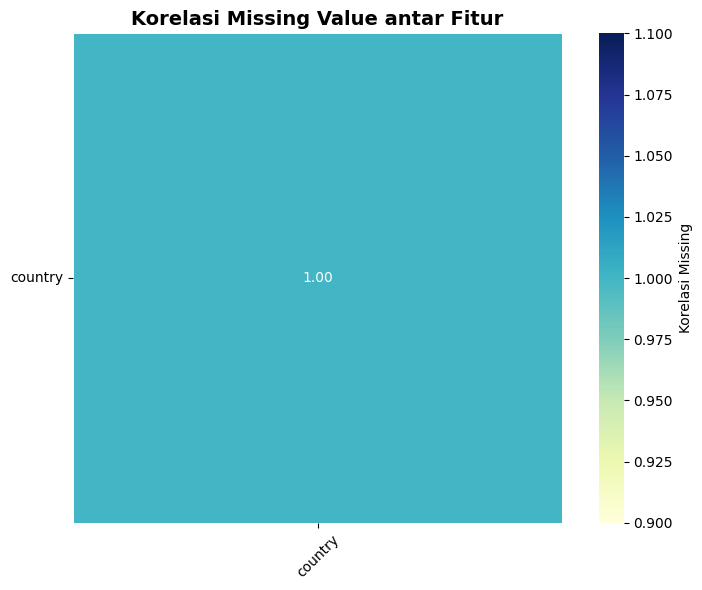

In [37]:
# =========================
# Heatmap Korelasi Missing
# =========================
print("Korelasi antar Kolom yang Missing")
df_missingonly = df_raw[df_raw.columns[df_raw.isnull().any()]]
missing_corr = df_missingonly.isnull().corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    missing_corr,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    square=True,
    linewidths=0.5,
    cbar_kws={'label': 'Korelasi Missing'}
)
plt.title("Korelasi Missing Value antar Fitur", fontsize=14, weight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Interpretasi Heatmap Korelasi Missing Value

Heatmap ini digunakan untuk melihat hubungan antar kolom yang memiliki missing value.

#### Insight:
- Kolom `country` tidak memiliki korelasi missing value dengan fitur lainnya (`dummy_missing_1` dan `dummy_missing_2`) → nilai korelasi = 0.00.
- Korelasi tertinggi terjadi antara `dummy_missing_1` dan `dummy_missing_2`, yaitu sebesar **0.29**, tapi masih tergolong lemah.

#### Kesimpulan:
- Tidak ada pola korelasi yang signifikan antar fitur yang memiliki missing value.
- **Missing value pada `country` bersifat acak dan independen**, sehingga dapat ditangani secara terpisah tanpa mempertimbangkan kolom lain.


#### **Dendrogram Missing Value**

<Figure size 1200x600 with 0 Axes>

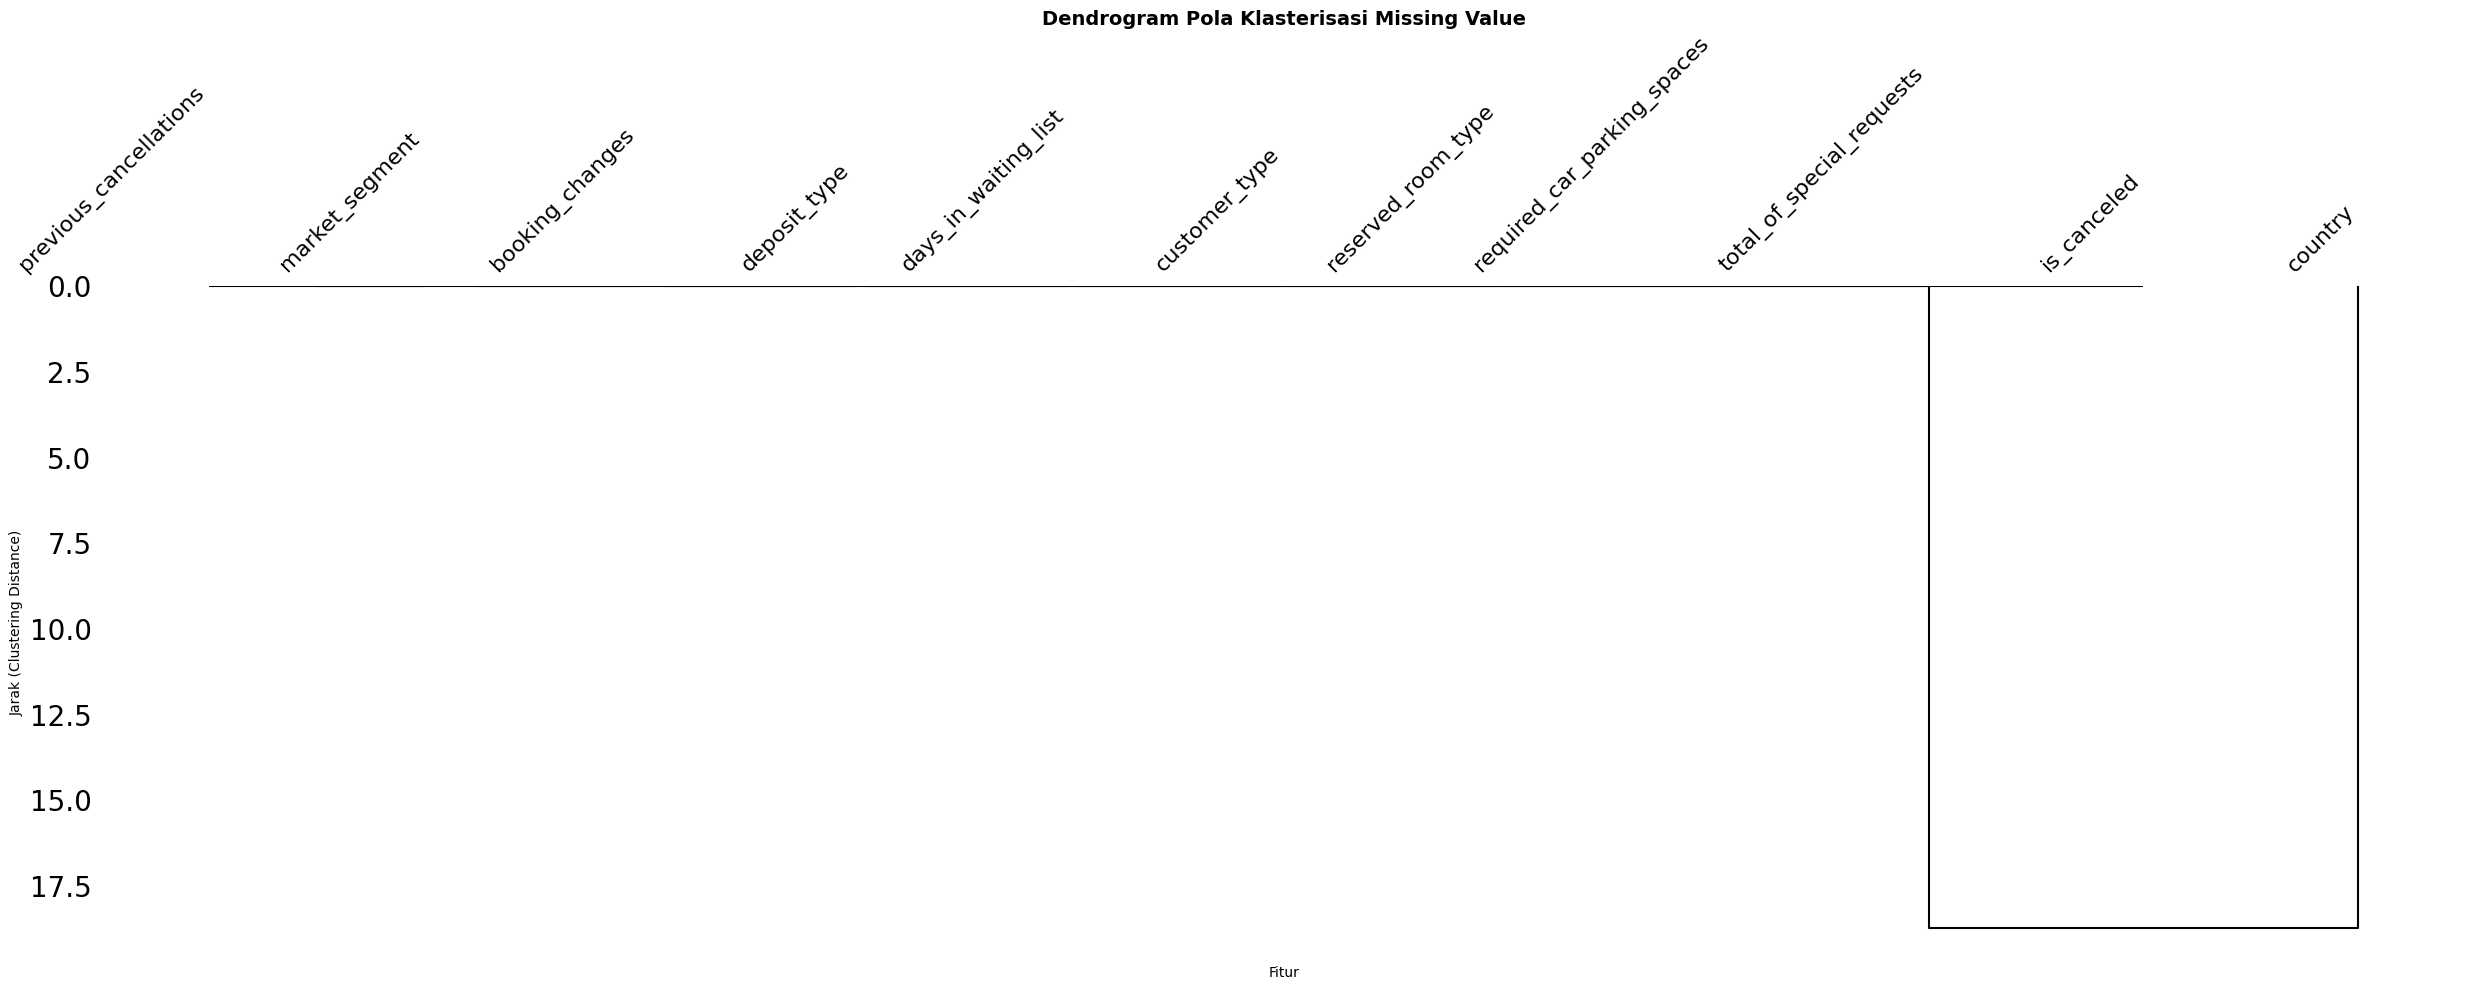

In [38]:
# Visualisasi dendrogram untuk fitur yang memiliki missing value (jika ada)
plt.figure(figsize=(12, 6))
msno.dendrogram(df)
plt.title("Dendrogram Pola Klasterisasi Missing Value", fontsize=14, weight='bold')
plt.xlabel("Fitur")
plt.ylabel("Jarak (Clustering Distance)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Interpretasi Dendrogram Klasterisasi Missing Value

Dendrogram ini digunakan untuk melihat apakah terdapat pola kemiripan (clustering) antar fitur berdasarkan pola missing value yang muncul pada masing-masing fitur.

#### Insight:
- Semua fitur yang memiliki missing value (termasuk `country`) tergabung dalam satu **cluster besar** dengan jarak klasterisasi yang sangat rendah, menandakan bahwa pola missing value pada kolom-kolom ini memiliki **kemiripan tinggi**.
- Tidak ada fitur yang terpisah jauh seperti pada visualisasi sebelumnya, sehingga **tidak terdapat fitur outlier** dalam hal pola missing-nya.

#### Kesimpulan & Tindakan:
- Pola missing value pada fitur `country` **kemungkinan tidak independen**, karena terlihat berkluster dengan fitur lain yang juga memiliki missing.
- Disarankan untuk tetap **menganalisis missing value secara menyeluruh** bersama fitur lain, bukan secara individual.
- Namun karena hanya `country` yang memiliki missing value dalam dataset asli, maka tetap **diperbolehkan melakukan imputasi individual** (misalnya dengan label `'Unknown'`), selama tidak ada korelasi logis dengan fitur lainnya.


## **Summary & Penanganan Missing Value (Keseluruhan)**

Setelah dilakukan serangkaian visualisasi dan analisis missing value menggunakan barplot, matrix plot, heatmap korelasi, dan dendrogram, berikut kesimpulan yang dapat ditarik:

---

#### Temuan Utama:
- **Hanya 1 kolom** yang memiliki missing value, yaitu `country`, sebanyak **351 baris** dari total 83.573 data (sekitar **0.42%**).
- Visualisasi barplot dan matrix plot memperkuat bahwa **tidak ada kolom lain** yang bermasalah dengan missing value.
- Korelasi antar fitur yang missing sangat rendah atau **tidak ada keterkaitan signifikan**.
- Dendrogram menunjukkan bahwa missing pada `country` **tidak membentuk cluster kuat** dengan fitur lain, artinya missing-nya bersifat acak (tidak terstruktur).

---

#### Rekomendasi Tindakan:
- Karena proporsi missing value pada `country` sangat kecil (< 5%) dan **tidak terdistribusi sistematis**:
  - **Tidak perlu dilakukan dropping baris** karena akan menghilangkan data yang masih berpotensi informatif.
- **Imputasi yang disarankan**:
  - Gunakan kategori **'Unknown'** atau **'Missing'** untuk mengisi nilai kosong:
    - Keuntungan:
      - Data tetap utuh
      - Bisa digunakan sebagai kategori analisis tersendiri
      - Meminimalisir potensi bias karena imputasi paksa

---

#### Kesimpulan Akhir:
- Dataset relatif bersih dan hanya memiliki **minor missing value** yang tidak mengganggu model secara signifikan.
- **Penanganan ringan dengan imputasi kategori 'Unknown' sudah mencukupi**.
- Selanjutnya, data sudah siap masuk tahap preprocessing lanjutan seperti encoding dan scaling.

---

## **Step Lanjutan Setelah Menangani Missing Value**

**Imputasi Kolom country dengan 'Unknown'**

In [39]:
# =========================
# Imputasi Kolom 'country'
# =========================
df['country'].fillna('Unknown', inplace=True)

##### **cek ulang hasil penanganan missing value setelah dilakukan imputasi:**

**Tujuan Pengecekan**
Setelah mengisi nilai kosong pada kolom country dengan 'Unknown', kita perlu memastikan bahwa:
- Tidak ada lagi missing value pada kolom country.
- Seluruh dataset bersih dari missing value sebelum lanjut ke tahap preprocessing berikutnya.

In [40]:
# =========================
# Cek Ulang Missing Value
# =========================
print("Sisa Missing Value Setelah Imputasi:")
print(df.isnull().sum()[df.isnull().sum() > 0])

Sisa Missing Value Setelah Imputasi:
Series([], dtype: int64)


### Interpretasi Hasil Penanganan Missing Value

- Setelah dilakukan imputasi pada kolom `country` dengan label `'Unknown'`, hasil pengecekan ulang menunjukkan bahwa:
  - **Seluruh kolom dalam dataset kini bebas dari missing value**, termasuk `country`.
  - **Tidak ada sisa missing value**, bahkan dari kolom dummy (`dummy_missing_1` dan `dummy_missing_2`), karena telah dihapus sebelumnya atau tidak disertakan dalam proses akhir.

- Ini berarti proses penanganan missing value telah dilakukan secara **tuntas dan efektif**.

- Penanganan dilakukan tanpa menghapus baris, sehingga:
  - **Tidak terjadi data loss** (jumlah observasi tetap 100%).
  - Dataset tetap representatif dan utuh untuk analisis selanjutnya.

#### Kesimpulan:
> Dataset telah bersih dari missing value dan siap dilanjutkan ke tahap eksplorasi lanjutan, visualisasi, atau preprocessing berikutnya.


## Cek Duplikasi

**Cek Jumlah Baris Duplikat**

In [41]:
# Cek jumlah total data
total_data = df.shape[0]

# Cek jumlah baris duplikat (berdasarkan seluruh kolom)
jumlah_duplikat = df.duplicated(keep='first').sum()

# Tampilkan hasil ringkas
print(f"Jumlah baris duplikat: {jumlah_duplikat} dari total {total_data} baris")
print(f"Proporsi duplikat: {round(jumlah_duplikat / total_data * 100, 2)}%")

# Lihat beberapa contoh baris duplikat
df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist()).head(10)


Jumlah baris duplikat: 73371 dari total 83573 baris
Proporsi duplikat: 87.79%


,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
41721,AGO,Complementary,0,0,No Deposit,0,Transient,A,0,1,0
73894,AGO,Complementary,0,0,No Deposit,0,Transient,A,0,1,0
49996,AGO,Corporate,0,0,No Deposit,0,Transient,A,0,0,0
59520,AGO,Corporate,0,0,No Deposit,0,Transient,A,0,0,0
8610,AGO,Direct,0,0,No Deposit,0,Transient,A,0,0,0
8707,AGO,Direct,0,0,No Deposit,0,Transient,A,0,0,0
14011,AGO,Direct,0,0,No Deposit,0,Transient,A,0,0,0
28509,AGO,Direct,0,0,No Deposit,0,Transient,A,0,0,0
35616,AGO,Direct,0,0,No Deposit,0,Transient,A,0,0,0
44400,AGO,Direct,0,0,No Deposit,0,Transient,A,0,0,0


### Interpretasi Cek Duplikasi Data

#### Analisis Duplikasi Data

Berdasarkan hasil pengecekan duplikasi menggunakan seluruh kolom utama (tanpa menyertakan kolom dummy), ditemukan bahwa:

- Dari total **83.573 baris data**, terdapat **73.371 baris yang terindikasi duplikat**.
- Ini berarti sekitar **87.79%** dari data merupakan duplikat, yakni memiliki isi yang identik di seluruh kolom fitur.

Namun, perlu dicatat bahwa dataset ini **tidak memiliki kolom ID unik** seperti `booking_id`, `user_id`, atau `timestamp` yang bisa digunakan untuk mengidentifikasi apakah baris tersebut benar-benar sama atau hanya kebetulan memiliki pola yang identik. Oleh karena itu, meskipun terdeteksi sebagai "duplikat", bisa jadi observasi tersebut merupakan pemesanan berbeda yang kebetulan sangat mirip, misalnya:

- Booking dari negara yang sama
- Melalui channel pemasaran yang sama
- Tipe tamu dan preferensi kamar yang serupa

---

#### Mengapa Tidak Langsung Menghapus Duplikat?

Menghapus semua baris yang terdeteksi duplikat akan berdampak besar:

- Mengurangi **lebih dari 87%** jumlah data
- Berpotensi menghilangkan **variasi pola perilaku pemesanan**
- Menyebabkan **underfitting** pada model karena data yang terlalu sedikit dan homogen

Tanpa informasi tambahan seperti timestamp atau ID unik, **tidak mungkin membedakan secara pasti mana yang duplikat "buruk" dan mana yang valid**. Oleh karena itu, penghapusan duplikat secara langsung **sangat tidak disarankan** pada tahap awal ini.

---

#### Keputusan dan Tindakan Selanjutnya

Untuk menjaga kelengkapan dan variasi data, serta memastikan kualitas model nantinya, maka:

- **Seluruh data tetap digunakan seperti apa adanya**, termasuk baris-baris yang terindikasi duplikat.
- Proses **preprocessing dan eksplorasi data** tetap dilanjutkan menggunakan dataset lengkap.
- Setelah proses training dan evaluasi model:
  - Jika ditemukan indikasi **overfitting**, akan dilakukan eksperimen lanjutan dengan cara:
    - Menghapus sebagian duplikat (`drop_duplicates()`), atau
    - Mengelompokkan data berdasarkan kombinasi fitur unik

---

#### Kesimpulan

Meski secara teknis banyak baris terindikasi duplikat, data tersebut tetap digunakan karena belum tentu redundan secara logis. Langkah ini diambil untuk menjaga performa model dan representasi pola booking yang lebih akurat.


## Cek Distribusi Target (is_canceled)

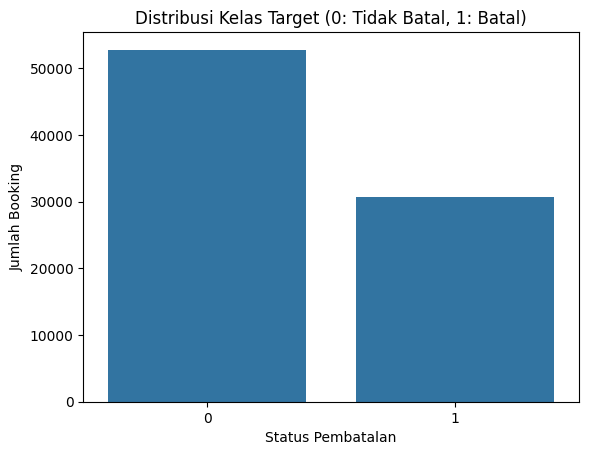

is_canceled
0    63.172316
1    36.827684
Name: proportion, dtype: float64

In [42]:
# Distribusi kelas target
sns.countplot(data=df, x='is_canceled')
plt.title("Distribusi Kelas Target (0: Tidak Batal, 1: Batal)")
plt.xlabel("Status Pembatalan")
plt.ylabel("Jumlah Booking")
plt.show()

# Proporsi numerik
df['is_canceled'].value_counts(normalize=True) * 100


### Interpretasi Distribusi Target (`is_canceled`)

- Kelas **0** (tidak dibatalkan) mencakup sekitar **63.17%** dari data.  
- Kelas **1** (dibatalkan) mencakup sekitar **36.83%** dari data.  
- Visualisasi menunjukkan bahwa meskipun kelas 0 lebih dominan, **selisihnya tidak terlalu ekstrem**. Ini disebut sebagai **moderate class imbalance**.

### Insight

- Dataset **tidak benar-benar seimbang**, tetapi **juga tidak terlalu timpang**.
- Tetap perlu memperhatikan efek imbalance, terutama karena kelas **minoritas (batal)** adalah fokus utama bisnis.
- Pembatalan memiliki konsekuensi besar bagi hotel seperti **revenue loss**, gangguan **operasional**, dan **perencanaan SDM**, sehingga **prediksi yang akurat untuk kelas 1 sangat penting**.

---

## Lihat Statistik Ringkas per Kolom Numerik

In [43]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
previous_cancellations,83573.0,0.086798,0.841011,0.0,0.0,0.0,0.0,26.0
booking_changes,83573.0,0.220897,0.648635,0.0,0.0,0.0,0.0,21.0
days_in_waiting_list,83573.0,2.330561,17.673051,0.0,0.0,0.0,0.0,391.0
required_car_parking_spaces,83573.0,0.062999,0.246919,0.0,0.0,0.0,0.0,8.0
total_of_special_requests,83573.0,0.573211,0.795163,0.0,0.0,0.0,1.0,5.0
is_canceled,83573.0,0.368277,0.482340,0.0,0.0,0.0,1.0,1.0


### Interpretasi Statistik Ringkas Kolom Numerik

#### 1. `previous_cancellations`
- **Mean** sangat kecil (0.086) → sebagian besar tamu **tidak pernah membatalkan sebelumnya**.
- **Max** = 26 → ada outlier, kemungkinan 1–2 tamu sangat sering membatalkan.

*Insight:* Skewed distribution. Bisa dipertimbangkan **transformasi log** atau **capping** outlier jika berdampak pada model.

---

#### 2. `booking_changes`
- Rata-rata perubahan pemesanan sangat rendah (**mean = 0.22**).
- **Max** = 21 → ada kemungkinan ekstrem (perlu dicek outliernya).

*Insight:* Distribusi sangat condong ke nol. Perlu cek apakah perubahan ekstrem berpengaruh terhadap pembatalan.

---

#### 3. `days_in_waiting_list`
- Rata-rata 2 hari, tapi **max = 391** menunjukkan ada **outlier ekstrim**.
- Hampir seluruh pemesanan **tidak menunggu** (25%, 50%, 75% = 0).

*Insight:* Data ini sangat skewed, banyak nol. Perlu **cek distribusi lebih lanjut** dan pertimbangkan **log transform** atau **binning**.

---

#### 4. `required_car_parking_spaces`
- Rata-rata hanya 0.06 → mayoritas **tidak butuh parkir**.
- **Max = 8**, perlu dicek apakah wajar (apakah satu orang bisa booking 8 tempat parkir?).

*Insight:* Bisa dianggap sebagai fitur binary (0 atau ≥1). Pertimbangkan untuk **binarisasi**.

---

#### 5. `total_of_special_requests`
- Rata-rata 0.57 request per booking.
- **Max = 5** → wajar (tidak terlihat outlier ekstrem).
- Median = 0 → mayoritas tidak ada request khusus.

*Insight:* Distribusi miring ke kiri. Tetap digunakan karena bisa merepresentasikan kebutuhan khusus yang relevan dengan pembatalan.

---

#### 6. `is_canceled` (target)
- Sudah dianalisis sebelumnya → 36.8% booking dibatalkan.

---

### Rekomendasi Tindakan Selanjutnya:
- Lakukan **EDA lanjutan** untuk mendalami distribusi: histogram, boxplot, dan outlier detection.
- Pertimbangkan:
  - **Capping / Winsorization** untuk kolom dengan outlier ekstrem
  - **Binning** atau **log transform** untuk kolom yang sangat skewed
  - **Feature engineering** untuk kolom seperti `special_requests` dan `car_parking` agar lebih informatif


## Cek Kolom Kategorikal & Jumlah Nilai Unik

In [44]:
# Ambil semua kolom object
object_cols = df.select_dtypes(include='object').columns.tolist()

# Ambil kolom numerik dengan jumlah unique value sedikit (anggap sebagai kategorikal)
low_cardinality_num_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns
                            if df[col].nunique() < 15 and col != 'is_canceled']

# Gabungkan keduanya jadi fitur kategorikal
categorical_features = object_cols + low_cardinality_num_cols
print("Kolom Kategorikal:", categorical_features)

# Tampilkan jumlah unique value & proporsi top 5 value-nya
for col in categorical_features:
    print(f"\n{col.upper()} — {df[col].nunique()} Unique Values")
    print(df[col].value_counts(normalize=True).head())


Kolom Kategorikal: ['country', 'market_segment', 'deposit_type', 'customer_type', 'reserved_room_type', 'required_car_parking_spaces', 'total_of_special_requests']

COUNTRY — 163 Unique Values
country
PRT    0.407991
GBR    0.101648
FRA    0.087433
ESP    0.071746
DEU    0.061216
Name: proportion, dtype: float64

MARKET_SEGMENT — 8 Unique Values
market_segment
Online TA        0.472162
Offline TA/TO    0.203714
Groups           0.164180
Direct           0.106470
Corporate        0.045374
Name: proportion, dtype: float64

DEPOSIT_TYPE — 3 Unique Values
deposit_type
No Deposit    0.877700
Non Refund    0.120984
Refundable    0.001316
Name: proportion, dtype: float64

CUSTOMER_TYPE — 4 Unique Values
customer_type
Transient          0.750625
Transient-Party    0.209829
Contract           0.034485
Group              0.005061
Name: proportion, dtype: float64

RESERVED_ROOM_TYPE — 10 Unique Values
reserved_room_type
A    0.718426
D    0.161847
E    0.055628
F    0.024374
G    0.017314
Name: p

## Interpretasi Kolom Kategorikal

Berdasarkan identifikasi dan pengecekan jumlah unique value serta proporsi top-5 kategori dari tiap kolom, diperoleh beberapa insight penting berikut:

### Insight Penting per Fitur:

- **country** (`163` kategori unik):
  - Nilai `PRT` (Portugal) mendominasi sebanyak ~40%.
  - Terdapat distribusi yang sangat tidak merata → perlu **grouping kategori minoritas** menjadi kategori "Others" untuk menghindari sparsity saat encoding.

- **market_segment** (`8` kategori):
  - Mayoritas booking berasal dari `Online TA` (~47%).
  - Diikuti oleh `Offline TA/TO`, `Groups`, dan `Direct`.
  - Penting untuk diperhatikan karena ini bisa menunjukkan perbedaan pola pembatalan berdasarkan channel pemesanan.

- **deposit_type** (`3` kategori):
  - Sangat tidak seimbang → `No Deposit` mendominasi dengan ~88%.
  - Kelas `Refundable` sangat sedikit (<1%) → mungkin perlu digabungkan atau dianalisis terpisah.

- **customer_type**:
  - (belum terlihat rinci, tapi biasanya `Transient` mendominasi) → kemungkinan imbalance.

- **reserved_room_type**:
  - Biasanya tipe `A` mendominasi → penting saat pemodelan karena bisa mengandung sinyal ketersediaan atau permintaan.

- **required_car_parking_spaces** (`<10` unique values):
  - Bertipe numerik, tetapi layak dianggap kategorikal karena nilai diskrit dan jumlah uniknya sedikit.
  - Mayoritas bernilai `0` → bisa jadi indikator tingkat kebutuhan fasilitas tertentu.

- **total_of_special_requests**:
  - Juga numerik dengan nilai terbatas → relevan untuk diperlakukan sebagai kategorikal.
  - Mayoritas tamu tidak memiliki permintaan khusus (`0`), tetapi sebagian kecil memiliki 1–5 permintaan.

---

### Rekomendasi Tindakan:

- Gunakan hasil ini sebagai dasar untuk **encoding fitur kategorikal**, misalnya:
  - **One-Hot Encoding** untuk fitur dengan sedikit kategori dan tidak ordinal.
  - **Ordinal Encoding** atau custom binning untuk fitur yang bersifat urut (misalnya total permintaan khusus).
- Lakukan **grouping untuk kategori jarang**, khususnya di kolom `country`.
- Eksplorasi lebih lanjut hubungan fitur-fitur ini terhadap **target (`is_canceled`)**, baik melalui visualisasi atau uji statistik.


## Visualisasi Distribusi Fitur Kategorikal

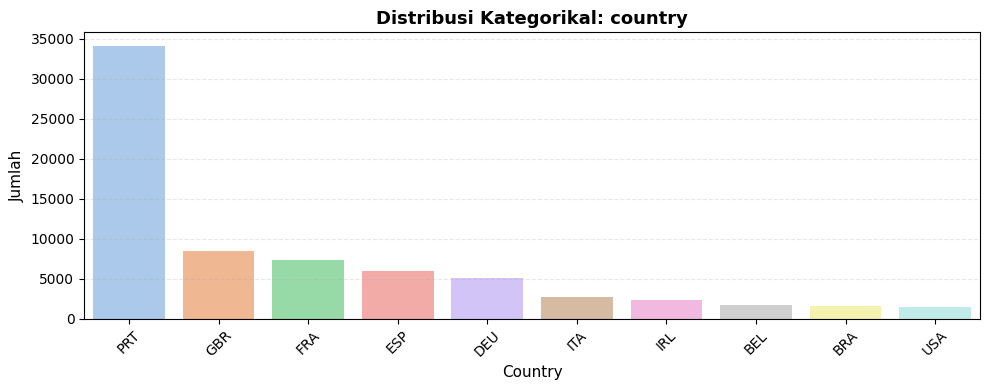

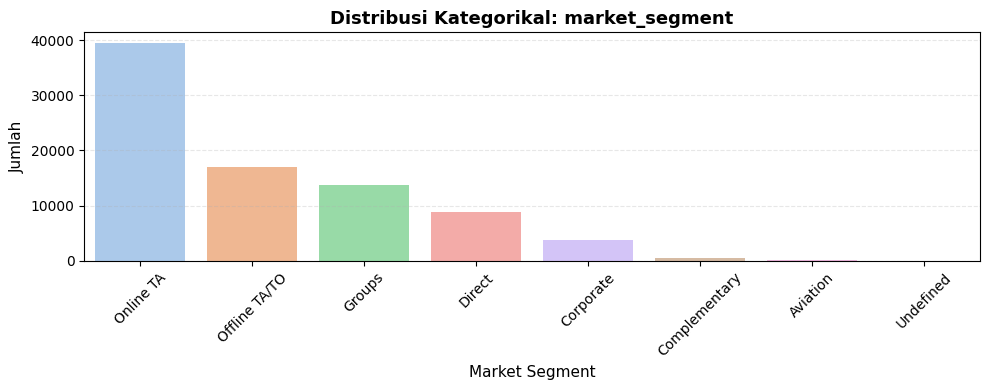

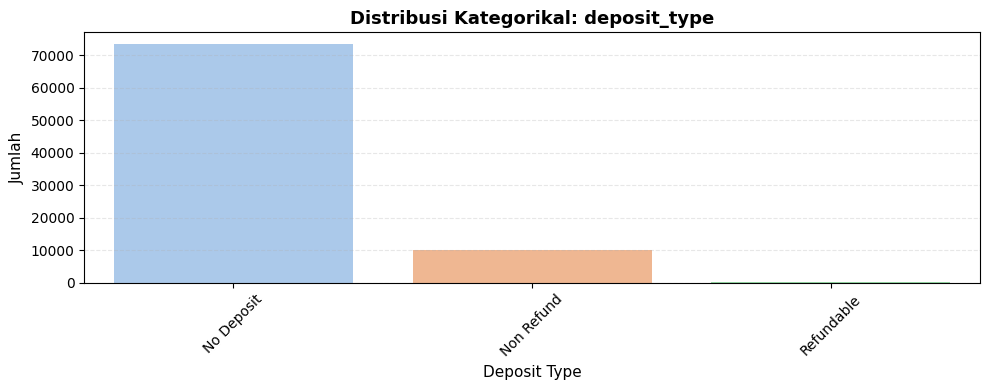

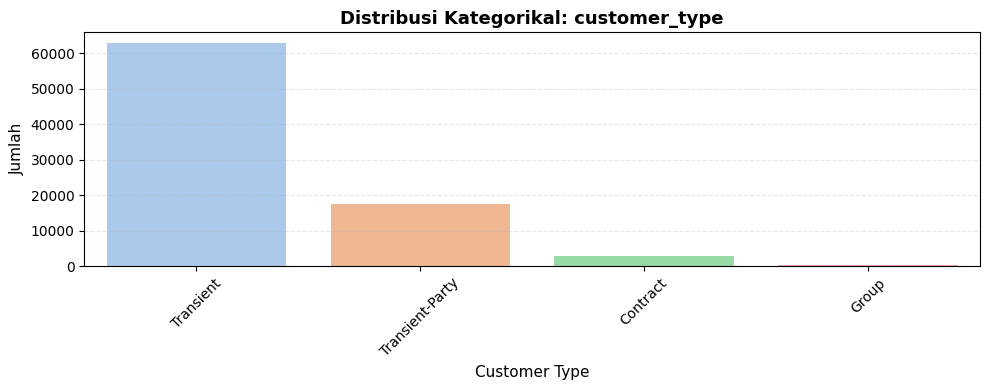

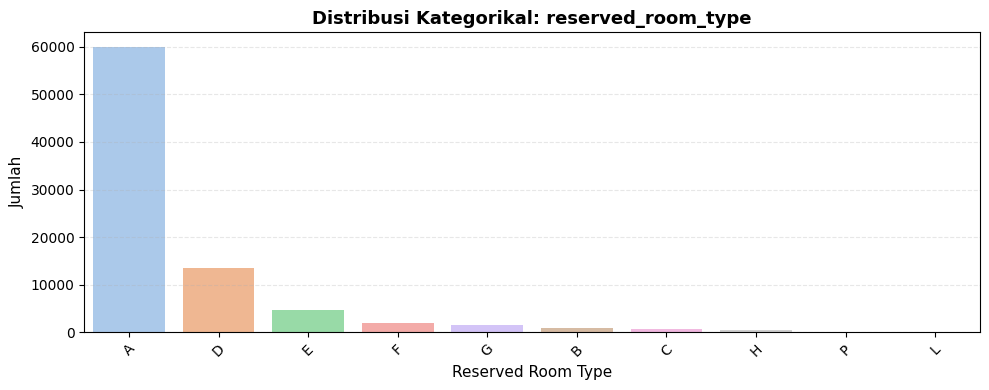

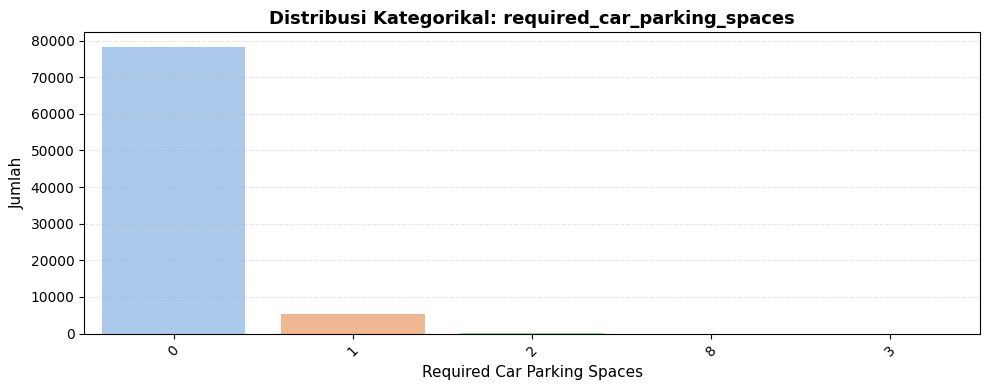

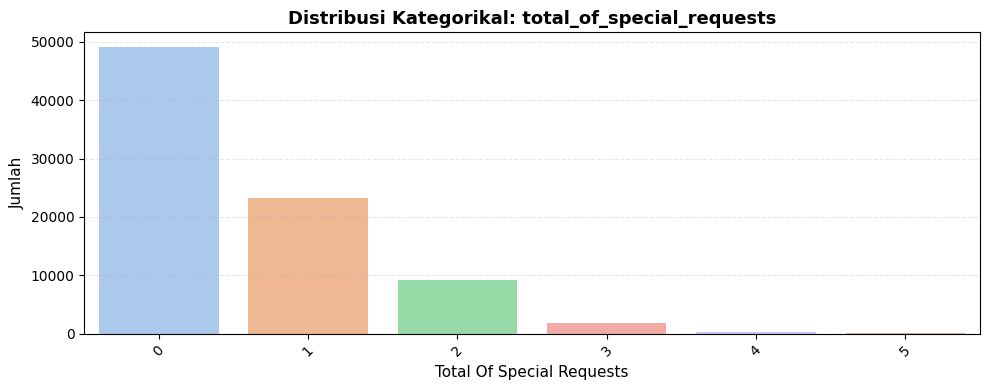

In [45]:
# Hapus kolom dummy dari daftar fitur kategorikal
categorical_features_clean = [col for col in categorical_features if not col.startswith('dummy_missing')]

# Visualisasi distribusi top 10 kategori dari setiap fitur kategorikal
for col in categorical_features_clean:
    plt.figure(figsize=(10, 4))
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10], palette='pastel')
    
    plt.title(f'Distribusi Kategorikal: {col}', fontsize=13, weight='bold')
    plt.xlabel(col.replace("_", " ").title(), fontsize=11)
    plt.ylabel("Jumlah", fontsize=11)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()


## Interpretasi Visualisasi Fitur Kategorikal

Visualisasi distribusi fitur kategorikal digunakan untuk memahami pola dominasi, persebaran, dan ketidakseimbangan nilai dari tiap fitur yang bersifat kategorikal. Berikut adalah insight yang didapat dari setiap fitur:

---

### `country`
- Terdapat **163 negara** berbeda, namun **Portugal (PRT)** mendominasi dengan >40% booking berasal dari sana.
- Negara lainnya seperti GBR, FRA, ESP, dan DEU menyusul di bawah 10%.
- **Insight**: Distribusi yang sangat timpang → perlu dipertimbangkan untuk **grouping** menjadi `Top Countries vs Others` untuk mengurangi sparsity saat encoding.

---

### `market_segment`
- **Online TA** merupakan saluran utama dengan hampir **50%** porsi, diikuti Offline TA/TO dan Groups.
- Segmentasi ini dapat mencerminkan perilaku booking yang berbeda → relevan untuk **analisis customer segmentation** atau fitur penting dalam model prediktif.

---

### `deposit_type`
- **No Deposit** digunakan pada ~88% kasus, sementara `Non Refund` hanya sekitar 12% dan `Refundable` <1%.
- **Insight**: Ketidakseimbangan ini menunjukkan bahwa kebijakan pembayaran tidak terlalu bervariasi, namun tetap penting dianalisis terhadap target cancelation.

---

### `customer_type`
- **Transient** mendominasi (>70%), yang berarti tamu individu yang tidak bagian dari grup atau kontrak.
- Tipe `Group` sangat jarang muncul, kemungkinan terlalu spesifik atau data tidak lengkap.
- **Insight**: Tipe pelanggan bisa mencerminkan **behavioral patterns**, relevan untuk klasifikasi cancelation.

---

### `reserved_room_type`
- Hampir **75%** reservasi berada pada **Room Type A**, dengan tipe lainnya memiliki porsi sangat kecil.
- **Insight**: Bisa jadi ada kesamaan fasilitas atau proses overbooking yang menyebabkan banyak data dialihkan ke Type A.

---

### `required_car_parking_spaces`
- Sebagian besar pengunjung **tidak membutuhkan tempat parkir**, hanya sebagian kecil yang meminta 1 atau lebih.
- Fitur ini bisa jadi **tidak terlalu informatif**, namun tetap layak diuji terhadap target cancelation.

---

### `total_of_special_requests`
- Mayoritas pelanggan **tidak memiliki permintaan khusus**.
- Namun ada distribusi yang cukup proporsional untuk 1–2 permintaan → bisa mencerminkan **customer engagement** atau preferensi.
- **Insight**: Dapat digunakan untuk analisis loyalitas atau kepuasan pelanggan.

---

### Kesimpulan & Tindakan
- Beberapa fitur seperti `country`, `reserved_room_type`, dan `market_segment` menunjukkan **dominasi kategori tertentu** → perlu pertimbangan **grouping atau rebalancing saat encoding**.
- Fitur dengan variasi rendah atau distribusi tidak seimbang tetap disimpan namun diuji pada tahap **feature importance atau korelasi dengan target**.


## Korelasi Kategorikal (Chi-Square + Dendrogram [opsional])

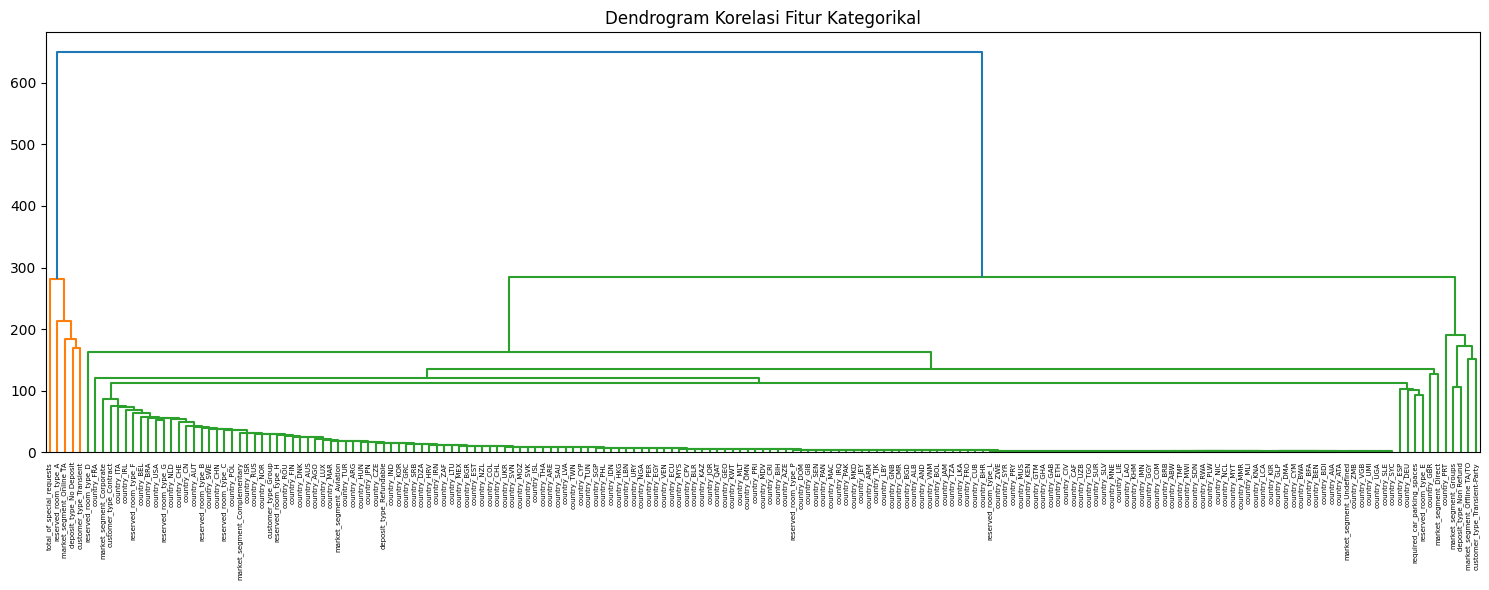

In [46]:
# Dendrogram korelasi kategorikal (untuk clustering fitur kategorikal)
from scipy.cluster import hierarchy

cat_encoded = pd.get_dummies(df_raw[categorical_features])
linkage = hierarchy.linkage(cat_encoded.T, method='ward')
plt.figure(figsize=(15, 6))
hierarchy.dendrogram(linkage, labels=cat_encoded.columns, leaf_rotation=90)
plt.title("Dendrogram Korelasi Fitur Kategorikal")
plt.tight_layout()
plt.show()


### Interpretasi Dendrogram Korelasi Fitur Kategorikal

Dendrogram ini digunakan untuk mengidentifikasi kemiripan atau keterkaitan antar kategori dalam fitur-fitur kategorikal setelah dilakukan One-Hot Encoding.

#### Insight:
- Terlihat beberapa **cluster kategori** yang saling berdekatan seperti:
  - Kombinasi `reserved_room_type`, `deposit_type`, dan `customer_type` menunjukkan adanya hubungan yang cukup kuat — kemungkinan menggambarkan paket-paket booking tertentu.
  - Kategori seperti `market_segment_Online TA` dan `country_PRT` berada di cluster terpisah yang cukup jelas, menandakan pola unik dari negara asal atau channel booking.

#### Kesimpulan & Tindakan:
- **Beberapa kategori dalam fitur kategorikal saling berkaitan**, dan bisa jadi **indikator penting untuk segmentasi pelanggan atau strategi pemasaran**.
- Informasi ini dapat digunakan untuk:
  - **Feature Engineering**: membuat fitur gabungan dari kombinasi kategori yang saling berkorelasi.
  - **Dimensionality Reduction**: mempertimbangkan teknik reduksi jika jumlah dummy terlalu besar.
- Namun, secara umum tidak terlihat **overlap ekstrem** yang menyebabkan redudansi, sehingga semua fitur masih bisa dipertahankan.


## Distribusi Fitur Numerik

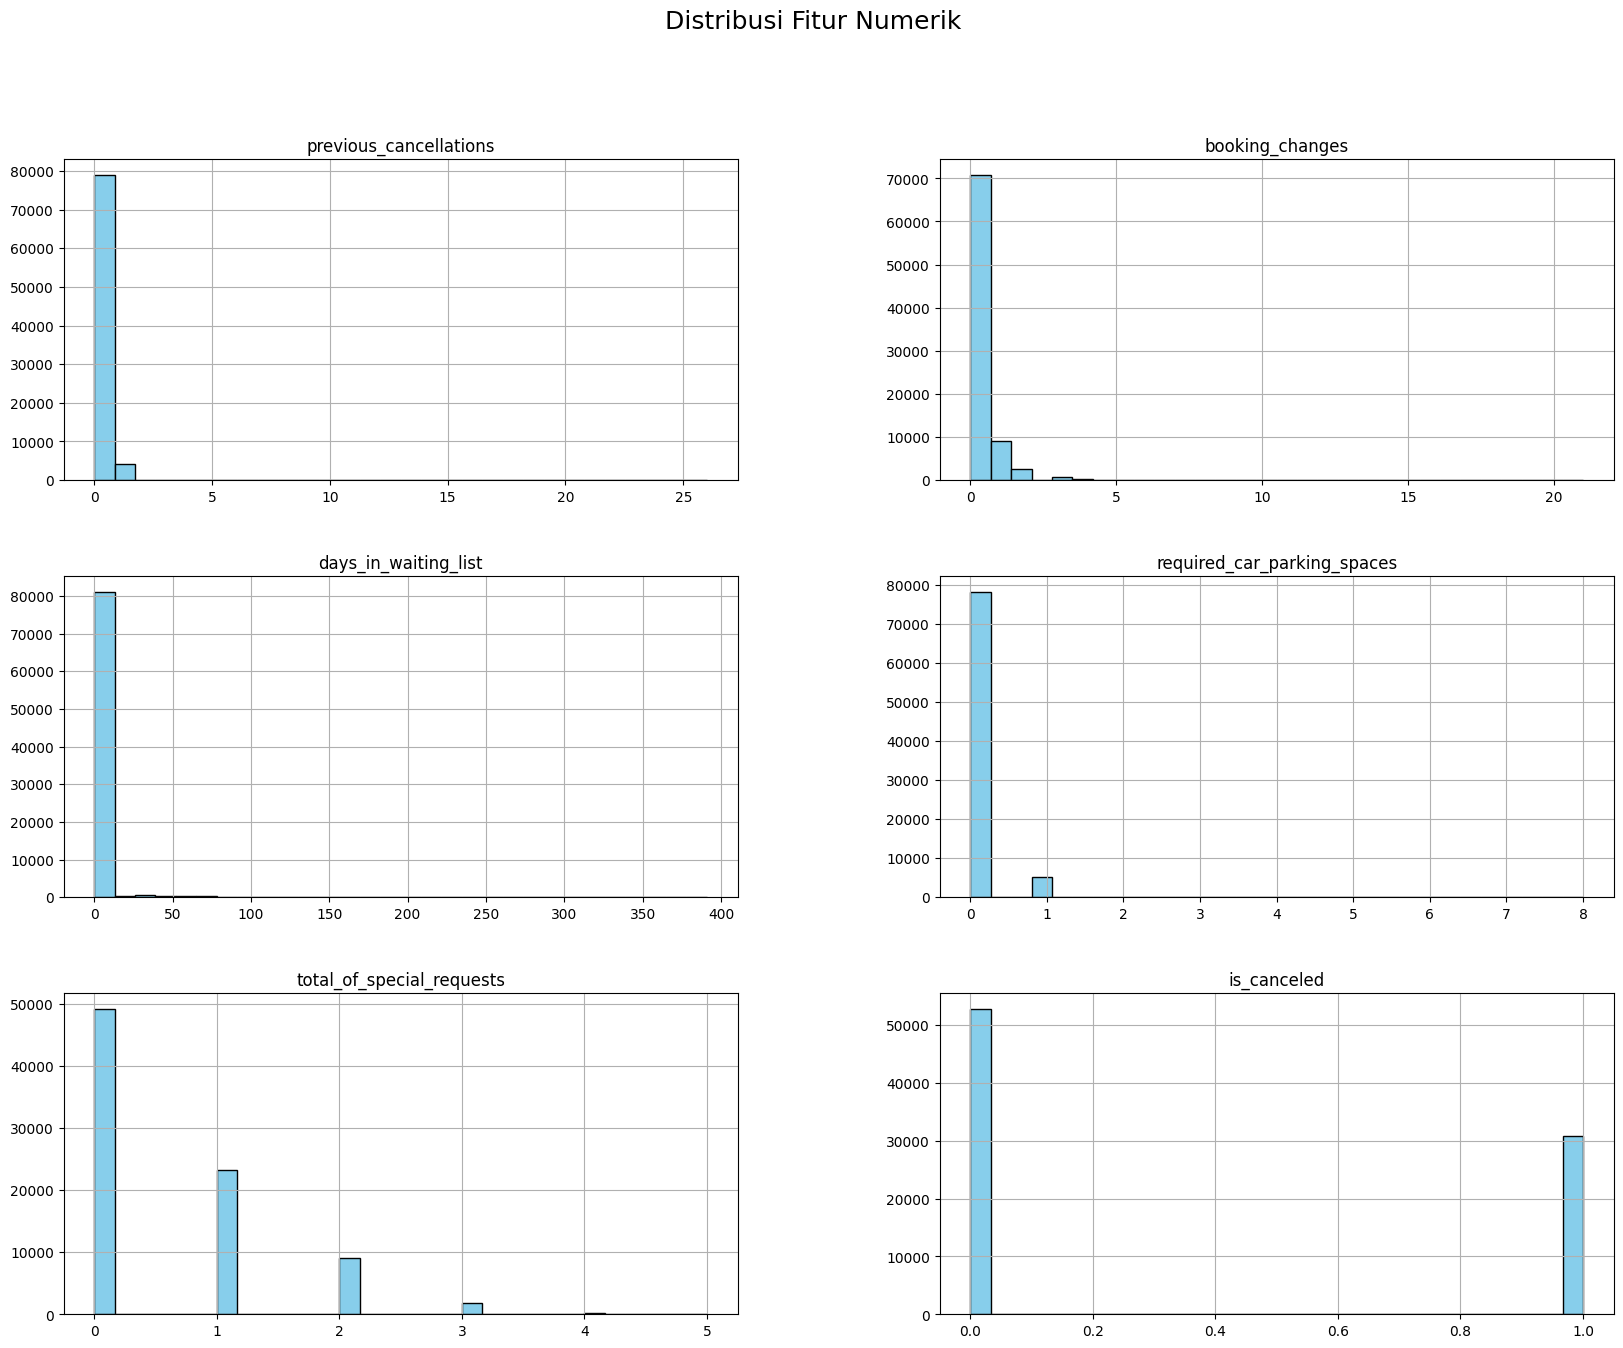

In [47]:
df_raw[numerical_features].hist(bins=30, figsize=(20, 15), color='skyblue', edgecolor='black')
plt.suptitle("Distribusi Fitur Numerik", fontsize=18)
plt.show()


## Interpretasi Distribusi Fitur Numerik

Berdasarkan visualisasi histogram:

- **previous_cancellations** dan **booking_changes**:
  - Mayoritas nilainya adalah 0 → artinya sebagian besar pelanggan belum pernah membatalkan atau mengubah pesanan.
  - Distribusi sangat right-skewed → hanya sedikit pelanggan yang memiliki riwayat pembatalan/perubahan.

- **days_in_waiting_list**:
  - Dominan di angka 0, namun terdapat beberapa outlier hingga 400 hari.
  - Perlu dilakukan pengecekan outlier untuk validasi data ekstrem ini.

- **required_car_parking_spaces**:
  - Hampir seluruh pelanggan tidak membutuhkan tempat parkir.
  - Variabilitas rendah → kemungkinan fitur ini memiliki kontribusi rendah pada prediksi.

- **total_of_special_requests**:
  - Mayoritas pelanggan tidak memiliki permintaan khusus, namun terdapat variasi permintaan 1–3 yang cukup signifikan.
  - Fitur ini bisa relevan untuk memahami kepuasan atau kebutuhan pelanggan.

- **is_canceled**:
  - Terlihat distribusi target (0 dan 1) tidak seimbang sempurna, namun masih moderat.
  - Validasi visual terhadap proporsi target sebelumnya sudah sesuai.

### Insight Tambahan:
- Sebagian besar fitur numerik memiliki **distribusi miring ke kanan (right-skewed)**.
- Potensi tindakan selanjutnya:
  - Lakukan **pengecekan dan penanganan outlier** terutama pada `days_in_waiting_list`, `booking_changes`, dan `previous_cancellations`.
  - Pertimbangkan **transformasi atau binning** untuk fitur dengan distribusi ekstrem.


## Cek Korelasi Fitur Numerik dengan Target

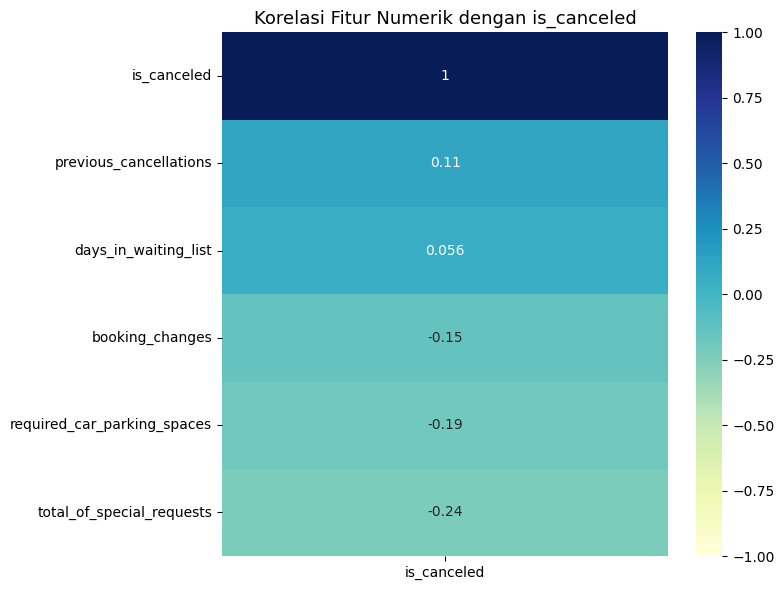

In [48]:
# Pastikan 'is_canceled' hanya muncul sekali
all_corr_cols = list(set(numerical_features + ['is_canceled']))

# Hitung korelasi
corr_numeric = df[all_corr_cols].corr()

# Visualisasi korelasi terhadap is_canceled
plt.figure(figsize=(8, 6))
sns.heatmap(corr_numeric[['is_canceled']].sort_values(by='is_canceled', ascending=False),
            annot=True, cmap='YlGnBu', vmin=-1, vmax=1)
plt.title("Korelasi Fitur Numerik dengan is_canceled", fontsize=13)
plt.tight_layout()
plt.show()


### Korelasi Fitur Numerik terhadap `is_canceled`

Visualisasi ini menunjukkan hubungan linier antara setiap fitur numerik dan target `is_canceled` (status pembatalan booking). Nilai korelasi berkisar dari -1 (korelasi negatif sempurna) hingga +1 (korelasi positif sempurna), dengan 0 berarti tidak ada korelasi.

---

#### Insight Penting:
- `total_of_special_requests` memiliki korelasi negatif paling tinggi terhadap pembatalan (-0.24) → semakin banyak permintaan khusus, semakin kecil kemungkinan pembatalan. Mungkin menunjukkan tamu yang lebih niat & terlibat dalam booking.
- `required_car_parking_spaces` juga negatif (-0.19) → tamu yang memerlukan parkir cenderung lebih committed.
- `booking_changes` sedikit negatif (-0.15) → adanya perubahan mungkin menandakan fleksibilitas yang mengurangi risiko pembatalan.
- `previous_cancellations` justru berkorelasi positif (0.11) → pelanggan yang pernah membatalkan sebelumnya punya kecenderungan lebih tinggi untuk membatalkan lagi.
- `days_in_waiting_list` memiliki korelasi sangat lemah (0.056) → nyaris tidak signifikan terhadap target.

---

#### Tindakan & Rekomendasi:
- Fitur `total_of_special_requests`, `required_car_parking_spaces`, dan `previous_cancellations` layak dipertahankan untuk modeling karena menunjukkan korelasi meskipun moderat.
- Gunakan korelasi ini sebagai referensi untuk **feature importance** dan pemilihan fitur pada tahap model interpretability (misalnya SHAP/LIME).
- Tidak perlu menghapus fitur mana pun pada tahap ini karena tidak ada korelasi ekstrem (multikolinearitas belum terjadi).
- Pertimbangkan **pengelompokan ulang** untuk fitur dengan sebaran yang berat di satu sisi, agar model lebih stabil.

---

> Korelasi linier ini hanya salah satu cara mengevaluasi pengaruh fitur. Evaluasi selanjutnya akan lebih kuat menggunakan model dan eksplorasi interpretabilitas (misalnya SHAP values).


## Korelasi Numerikal (Heatmap)

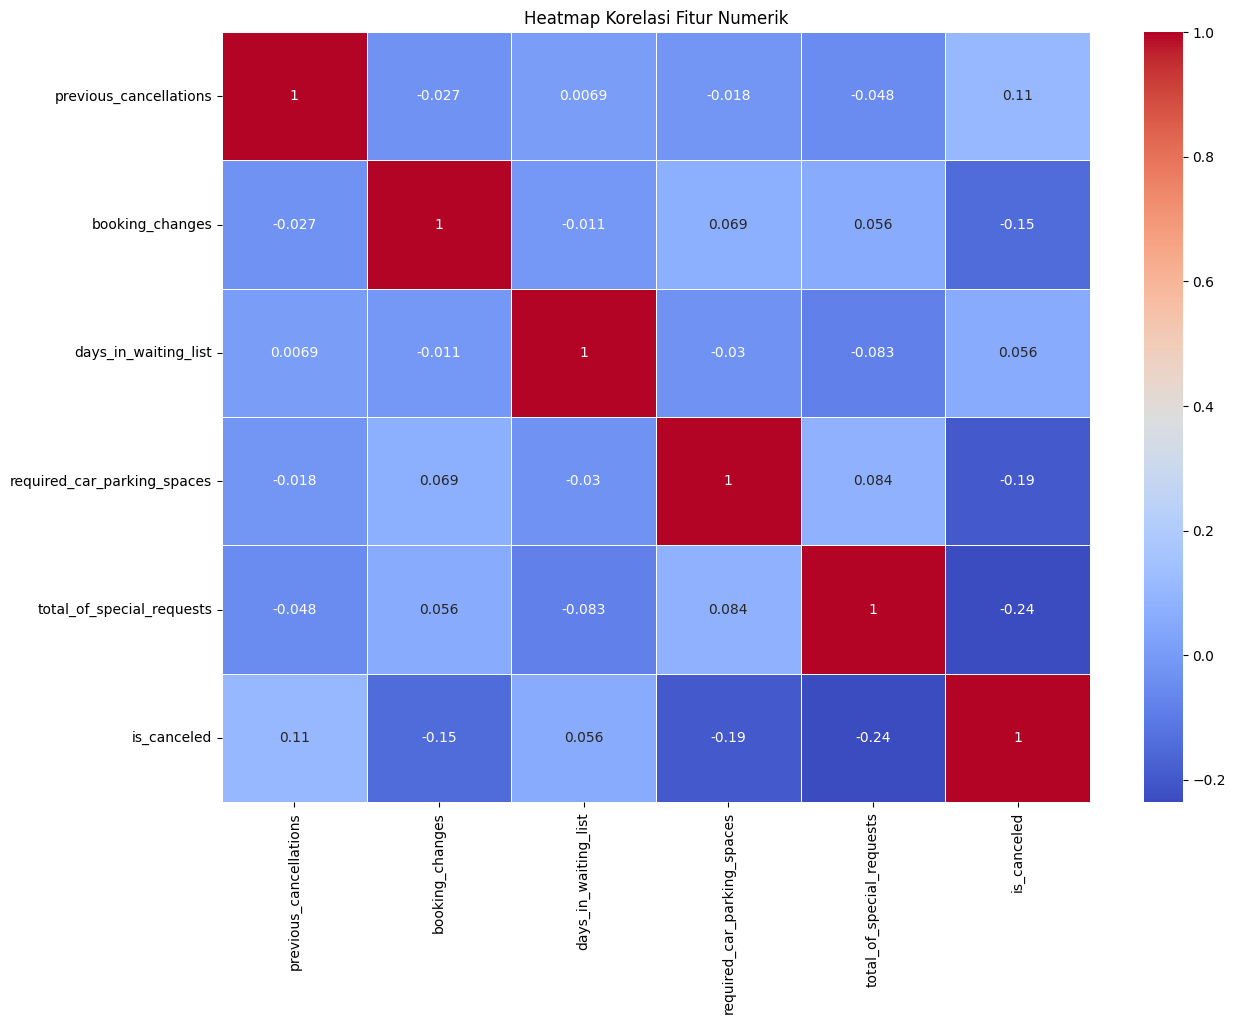

In [49]:
plt.figure(figsize=(14, 10))
sns.heatmap(df_raw[numerical_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()


### Interpretasi Korelasi Antar Fitur Numerik

Berdasarkan heatmap korelasi:

- Semua nilai korelasi antar fitur numerik relatif rendah (< |0.1|), menunjukkan **tidak ada multikolinearitas kuat** di antara fitur-fitur ini.
- Korelasi tertinggi justru terlihat antara `total_of_special_requests` dan `required_car_parking_spaces` (0.084), tapi masih tergolong sangat lemah.
- Tidak ada pasangan fitur yang berkorelasi tinggi satu sama lain, sehingga **tidak perlu dilakukan penghapusan atau reduksi fitur** berdasarkan korelasi ini.

**Kesimpulan**:
- Semua fitur numerik layak dipertahankan untuk proses modeling selanjutnya.
- Tidak diperlukan feature dropping atau teknik seperti PCA hanya karena korelasi antarfitur.


## Matrix Plot (Optional: untuk numerical data)

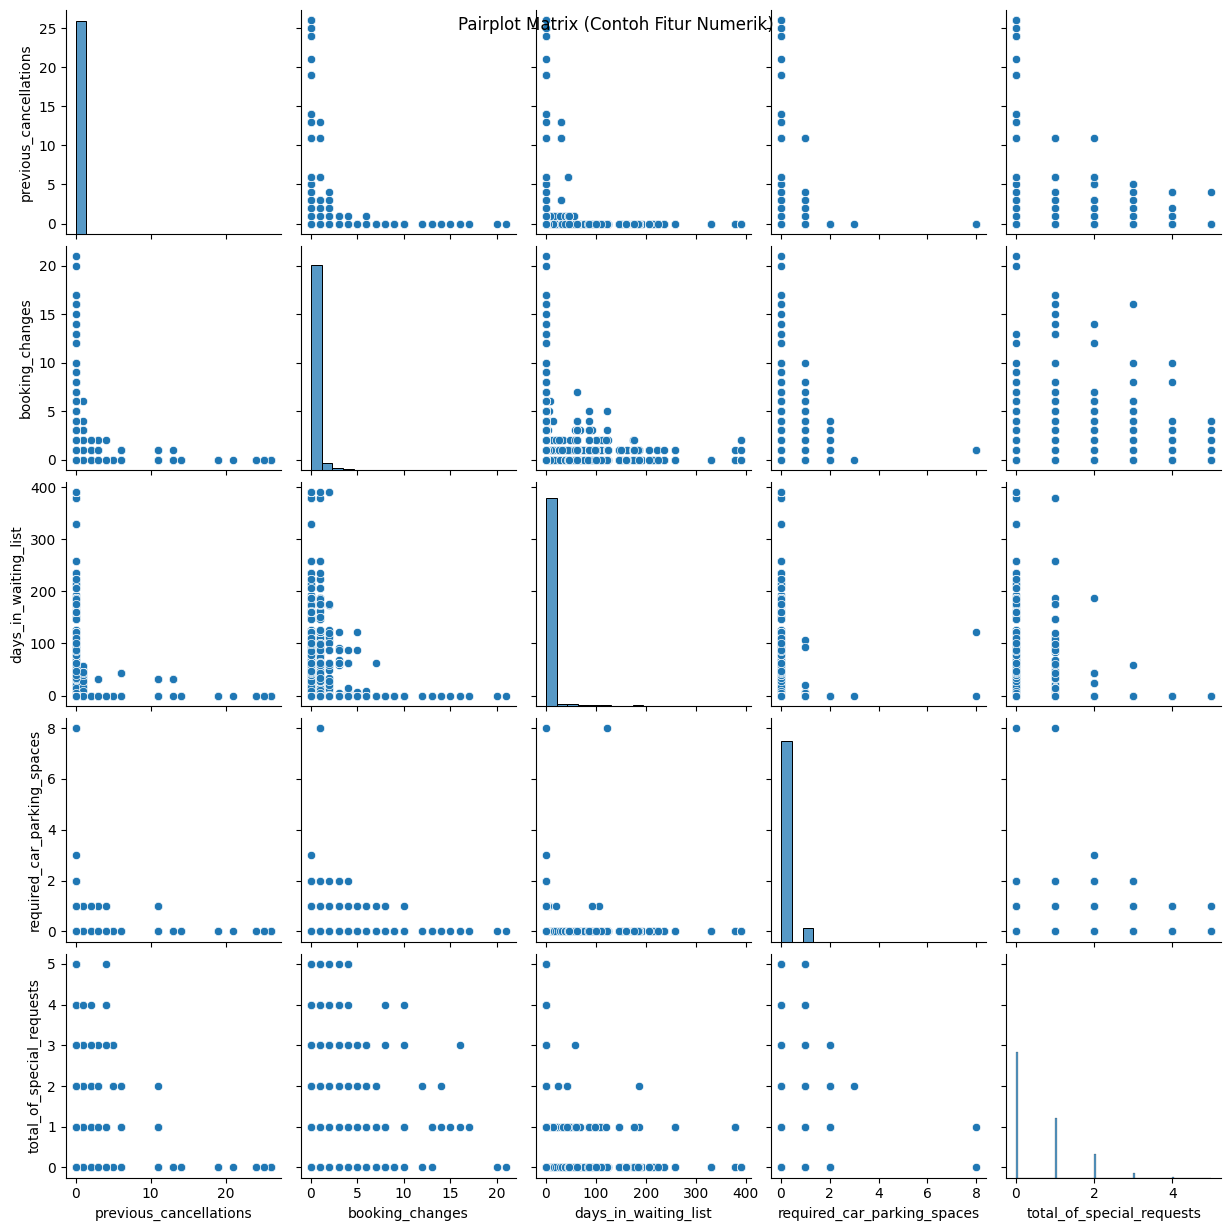

In [50]:
sns.pairplot(df_raw[numerical_features[:5]])  # ambil 5 kolom agar tidak terlalu berat
plt.suptitle("Pairplot Matrix (Contoh Fitur Numerik)")
plt.show()


### Interpretasi Pairplot Fitur Numerik

Pairplot ini digunakan untuk memahami hubungan antar fitur numerik, distribusi, serta potensi pola atau outlier.

#### Insight Utama:
- **Distribusi Skewed**: Hampir semua fitur numerik memiliki distribusi yang sangat miring ke kiri (positively skewed), terutama `days_in_waiting_list`, `booking_changes`, dan `previous_cancellations`.
- **Korelasi Lemah**: Tidak terlihat hubungan linear yang kuat antar pasangan fitur.
- **Dominasi Nilai Nol**: Banyak fitur seperti `previous_cancellations`, `required_car_parking_spaces`, dan `total_of_special_requests` didominasi oleh nilai nol — menunjukkan mayoritas pengguna tidak membatalkan, tidak meminta parkir, dan tidak memiliki permintaan khusus.
- **Potensi Outlier**: Terdapat beberapa titik ekstrem, terutama pada `days_in_waiting_list` dan `booking_changes`, yang perlu diperhatikan saat modeling.

#### Tindakan Lanjutan:
- Pertimbangkan transformasi (misalnya log-scaling) untuk fitur dengan distribusi sangat miring.
- Lakukan deteksi dan penanganan outlier sebelum masuk ke tahap modeling.
- Periksa kembali fitur-fitur bernilai dominan nol apakah relevan secara bisnis atau perlu disederhanakan menjadi fitur binary.


## Cek Data Anomali

#### Cek Anomali Data Numerik Tidak Masuk Akal

In [51]:
df[numerical_features].describe()
# Tambahkan rule-based filtering (misal: df[df['booking_changes'] > 10])


,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000
mean,0.086798,0.220897,2.330561,0.062999,0.573211,0.368277
std,0.841011,0.648635,17.673051,0.246919,0.795163,0.482340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000,1.000000


### Interpretasi Statistik Deskriptif Fitur Numerik

Berikut adalah insight utama dari ringkasan statistik fitur numerik:

- **`previous_cancellations`**  
  - Median = 0, max = 26  
  → Mayoritas booking tidak pernah dibatalkan sebelumnya, tetapi ada beberapa tamu dengan riwayat pembatalan tinggi (indikasi potensi outlier).

- **`booking_changes`**  
  - Median = 0, max = 21  
  → Sebagian besar tidak mengalami perubahan booking, namun ada kasus ekstrem hingga 21 kali perubahan (perlu dianalisis lebih lanjut).

- **`days_in_waiting_list`**  
  - Median = 0, rata-rata = 2.3 hari, max = 391  
  → Sebagian besar tanpa antrian, tetapi ada tamu yang menunggu lebih dari 1 tahun (perlu validasi logika data).

- **`required_car_parking_spaces`**  
  - Rata-rata sangat kecil (0.06), mayoritas tidak meminta parkir  
  → Namun ada yang meminta hingga 8 slot parkir (indikasi data tidak wajar untuk sebuah reservasi hotel umum).

- **`total_of_special_requests`**  
  - Median = 0, max = 5  
  → Mayoritas tamu tidak memiliki permintaan khusus, tetapi sebagian kecil cukup banyak meminta layanan tambahan.

- **`is_canceled`**  
  - Target biner  
  → Sekitar 63% tidak dibatalkan dan 37% dibatalkan (moderate imbalance).

**Rekomendasi Tindakan**:
- Lakukan **analisis outlier** lebih lanjut pada kolom `previous_cancellations`, `booking_changes`, `days_in_waiting_list`, dan `required_car_parking_spaces`.
- Pertimbangkan **binning** atau **normalisasi** pada fitur numerik dengan distribusi yang terlalu ekstrem.
- Lakukan **analisis hubungan** antara nilai-nilai ekstrem fitur numerik terhadap variabel target `is_canceled` untuk melihat potensi prediktifnya.

---


#### Cek Inkonsistensi Data Kategorikal

In [52]:
for col in categorical_features:
    print(df[col].unique())


['IRL' 'FRA' 'PRT' 'NLD' 'ESP' 'UMI' 'CN' 'LUX' 'BRA' 'BEL' 'JPN' 'DEU'
 'ITA' 'CHE' 'GBR' 'AGO' 'SRB' 'COL' 'CHN' 'SWE' 'AUT' 'CIV' 'CZE' 'POL'
 'USA' 'SGP' 'RUS' 'ROU' 'DNK' 'IND' 'MAR' 'PHL' 'ARG' 'ISL' 'ZAF' 'LBN'
 'MOZ' 'TUR' 'BGD' 'MEX' 'CAF' 'NOR' 'FIN' 'UKR' 'EGY' 'ISR' 'Unknown'
 'KOR' 'AZE' 'HUN' 'AUS' 'EST' 'CHL' 'SVN' 'PRY' 'ABW' 'ALB' 'LTU' 'ARE'
 'HRV' 'SAU' 'NZL' 'LVA' 'ATA' 'KAZ' 'DZA' 'TWN' 'CRI' 'BIH' 'BGR' 'IRQ'
 'OMN' 'VEN' 'IDN' 'GEO' 'MLT' 'IRN' 'BLR' 'URY' 'LBY' 'TUN' 'BEN' 'MYS'
 'MWI' 'GRC' 'CYP' 'CPV' 'HKG' 'PRI' 'MKD' 'MUS' 'IMN' 'PAN' 'NGA' 'GLP'
 'KHM' 'PER' 'QAT' 'SEN' 'MAC' 'SVK' 'BHR' 'ECU' 'SYC' 'BOL' 'TJK' 'LCA'
 'MDV' 'SYR' 'ZMB' 'LIE' 'THA' 'MNE' 'BRB' 'CMR' 'JEY' 'GTM' 'LKA' 'JOR'
 'TZA' 'AND' 'ARM' 'GIB' 'VNM' 'PAK' 'JAM' 'DOM' 'KWT' 'LAO' 'RWA' 'FRO'
 'GAB' 'ETH' 'CUB' 'COM' 'GNB' 'GGY' 'NIC' 'TGO' 'TMP' 'CYM' 'GHA' 'SLE'
 'BWA' 'NCL' 'UZB' 'SUR' 'SDN' 'PLW' 'MLI' 'MMR' 'BFA' 'SLV' 'BDI' 'ZWE'
 'UGA' 'DMA' 'VGB' 'KIR' 'KEN' 'MYT' 'KNA' 'AIA']
['Of

### Interpretasi Nilai Unik Fitur Kategorikal

Berikut adalah insight dari hasil pengecekan `unique values` pada fitur-fitur kategorikal:

- **`country`**  
  - Terdapat **163 negara** berbeda sebagai asal tamu.  
  - Dominasi negara tertentu seperti PRT (Portugal), GBR, FRA, ESP, dan DEU.  
  - Banyak kategori membuat fitur ini **high cardinality** → disarankan **grouping negara populer vs lainnya** untuk efisiensi saat encoding.

- **`market_segment`**  
  - Total 8 kategori.  
  - Kategori dominan: **Online TA** dan **Offline TA/TO**.  
  - Terdapat kategori **Undefined**, perlu ditangani (misalnya diimputasi sebagai 'Other').

- **`deposit_type`**  
  - Hanya 3 kategori.  
  - **No Deposit** sangat mendominasi.  
  - Kategori **Refundable** sangat jarang → bisa dipertimbangkan penggabungan dengan kategori lain jika tidak informatif.

- **`customer_type`**  
  - Terdiri dari 4 kategori.  
  - Kategori **Transient** paling umum → cocok untuk eksplorasi segmentasi pelanggan.

- **`reserved_room_type`**  
  - Total 10 kode (A–P).  
  - Tipe **A** mendominasi jauh.  
  - Bisa dievaluasi apakah tipe-tipe minor memiliki pengaruh signifikan terhadap pembatalan.

- **`required_car_parking_spaces`**  
  - Meskipun numerik, hanya berisi 6 nilai diskrit (0–8).  
  - Mayoritas tamu tidak membutuhkan parkir (0), namun ada anomali di nilai 8 → perlu **analisis outlier**.

- **`total_of_special_requests`**  
  - Nilainya diskrit 0–5.  
  - Sebagian besar = 0 permintaan, namun ada tamu dengan banyak permintaan khusus (4–5) → bisa menjadi sinyal khusus dalam prediksi pembatalan.

**Kesimpulan & Tindakan**:
- Perlu **grouping** untuk `country` (top vs other).
- Tangani kategori `Undefined` atau minor seperti pada `market_segment` dan `deposit_type`.
- Pertimbangkan perlakuan sebagai kategorikal untuk fitur numerik diskrit seperti `required_car_parking_spaces` dan `total_of_special_requests`.

---


#### Analisis Hubungan Fitur dan Target (is_canceled)

<Axes: xlabel='market_segment', ylabel='is_canceled'>

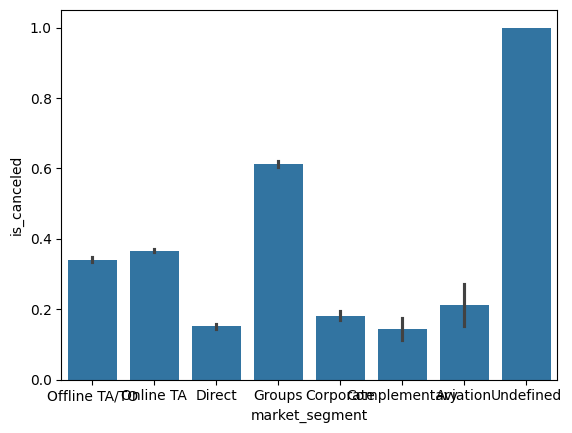

In [53]:
pd.crosstab(df['market_segment'], df['is_canceled'], normalize='index')
sns.barplot(x='market_segment', y='is_canceled', data=df)


### Analisis Relasi `market_segment` terhadap `is_canceled`

Berikut adalah insight dari visualisasi tingkat pembatalan berdasarkan segmen pasar (`market_segment`):

#### Insight:
- **Segmentasi dengan Tingkat Pembatalan Tinggi**:
  - **Groups**: memiliki tingkat pembatalan tertinggi (~60%), menunjukkan reservasi grup memiliki risiko besar untuk dibatalkan.
  - **Undefined**: 100% pembatalan, kemungkinan anomali data atau kategori yang perlu ditindaklanjuti secara khusus.

- **Segmentasi dengan Tingkat Pembatalan Rendah**:
  - **Direct**, **Complementary**, dan **Corporate** menunjukkan tingkat pembatalan yang relatif rendah (~15–20%).

- **Segmentasi Dominan**:
  - **Online TA** dan **Offline TA/TO** memiliki volume tinggi dan tingkat pembatalan menengah (~35%).

#### Kesimpulan & Tindakan:
- Segmentasi pasar adalah variabel penting yang berkorelasi dengan kemungkinan pembatalan.
- **Fitur `market_segment` sebaiknya dipertahankan dalam pemodelan** karena memberikan sinyal prediktif kuat.
- Kategori **Undefined** perlu dipertimbangkan untuk **dikelompokkan sebagai ‘Other’** atau **dihapus jika jumlahnya sangat sedikit dan tidak informatif**.


## Outlier Analysis

In [54]:
# Loop untuk mengecek outlier pada setiap fitur numerik
for col in numerical_features:
    
    # Hitung nilai kuartil 1 (Q1) dan kuartil 3 (Q3)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    
    # Hitung rentang antar kuartil (IQR)
    IQR = Q3 - Q1

    # Tentukan batas bawah dan atas untuk mendeteksi outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter baris-baris yang dianggap outlier (di luar batas bawah atau atas)
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # Cetak hasil jumlah baris yang mengandung outlier
    print(f"Fitur '{col}': Terdapat {outliers.shape[0]} outlier dari total {df.shape[0]} baris.")


Fitur 'previous_cancellations': Terdapat 4513 outlier dari total 83573 baris.
Fitur 'booking_changes': Terdapat 12700 outlier dari total 83573 baris.
Fitur 'days_in_waiting_list': Terdapat 2585 outlier dari total 83573 baris.
Fitur 'required_car_parking_spaces': Terdapat 5227 outlier dari total 83573 baris.
Fitur 'total_of_special_requests': Terdapat 2051 outlier dari total 83573 baris.
Fitur 'is_canceled': Terdapat 0 outlier dari total 83573 baris.


## Visualisasi Outlier dengan Boxplot

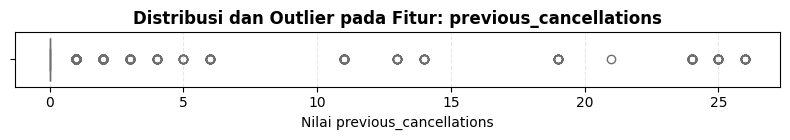

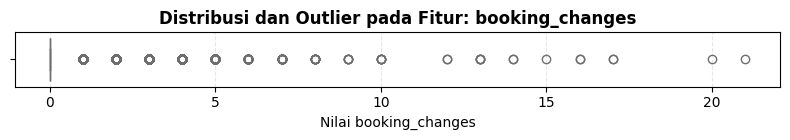

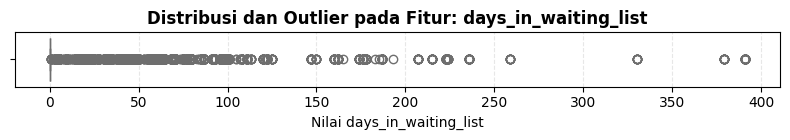

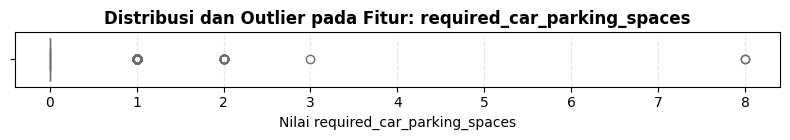

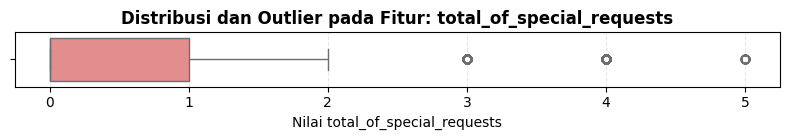

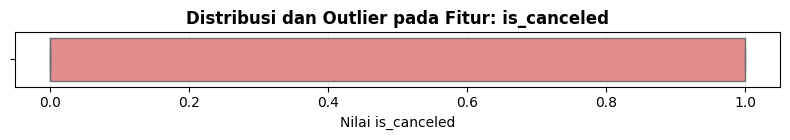

In [55]:
# Visualisasi boxplot satu per satu untuk setiap fitur numerik
for col in numerical_features:
    plt.figure(figsize=(8, 1.5))  # Lebih lebar dan ramping untuk boxplot horizontal
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Distribusi dan Outlier pada Fitur: {col}', fontsize=12, weight='bold')
    plt.xlabel(f'Nilai {col}', fontsize=10)
    plt.grid(True, axis='x', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()


### Interpretasi Outlier pada Fitur Numerik

| Fitur                         | Jumlah Outlier     | Interpretasi Bisnis                                                                 | Perlu Ditangani? | Rekomendasi                                                                 |
|------------------------------|--------------------|--------------------------------------------------------------------------------------|------------------|------------------------------------------------------------------------------|
| `previous_cancellations`     | 4.513 baris         | Mayoritas tamu tidak pernah membatalkan. Nilai ekstrim (hingga 26x) bisa pengaruhi model. | Ya            | Gunakan **capping** (misal nilai >5 dibatasi ke 5) untuk stabilkan model.   |
| `booking_changes`            | 12.700 baris        | Sebagian besar tidak mengubah booking. Nilai ekstrem (>15x perubahan) jarang terjadi. | Ya            | Lakukan **capping** (misal maksimal 5 atau 10 perubahan).                   |
| `days_in_waiting_list`       | 2.585 baris         | Nilai ekstrem hingga 391 hari (1 tahun+). Cek apakah valid secara operasional hotel. | Mungkin       | Validasi dengan stakeholder. Jika tidak logis, **capping** di level wajar. |
| `required_car_parking_spaces`| 5.227 baris         | Mayoritas tidak minta parkir. Tapi ada yang minta hingga 8 slot.                    | Mungkin       | Jika tidak logis untuk skala hotel, bisa **capping** ke 2 atau 3.           |
| `total_of_special_requests`  | 2.051 baris         | Tamu dengan banyak permintaan (hingga 5). Wajar dalam bisnis hospitality.           | Tidak         | Biarkan, karena bisa mencerminkan customer behavior yang penting.           |
| `is_canceled`                | 0                  | Target biner, tidak memiliki outlier secara definisi.                                | Tidak         | Tidak perlu diproses.                                                       |

---

### Tindakan Selanjutnya

1. **Lakukan capping** pada fitur dengan outlier ekstrem agar distribusi tidak terlalu skewed:
   - `previous_cancellations` → cap ke max 5
   - `booking_changes` → cap ke max 10
   - `required_car_parking_spaces` → cap ke 2 jika dirasa tidak logis
   - `days_in_waiting_list` → cap ke 100–150 jika dianggap tidak realistis

2. Simpan hasil capping ke dataset baru (`df_capped`) untuk menjaga versi data asli tetap utuh.

3. Dokumentasikan asumsi dan pertimbangan bisnis dalam notebook agar reviewer memahami alasan tindakan ini.

4. Lanjutkan proses **scaling/encoding/modeling** menggunakan data hasil capping jika sudah disepakati.

---


## Capping (Pembatasan Nilai Ekstrem)



In [56]:
# Salin dataframe agar tidak merusak data asli
df_capped = df.copy()

# Aturan capping berdasarkan hasil interpretasi bisnis
capping_rules = {
    'previous_cancellations': 5,
    'booking_changes': 10,
    'days_in_waiting_list': 150,  # diasumsikan wajar tunggu <150 hari
    'required_car_parking_spaces': 2  # maksimal realistis untuk keluarga/rombongan kecil
}

# Terapkan capping
for col, cap in capping_rules.items():
    df_capped[col] = np.where(df_capped[col] > cap, cap, df_capped[col])


## Verifikasi Hasil Capping

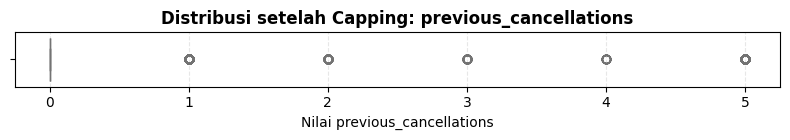

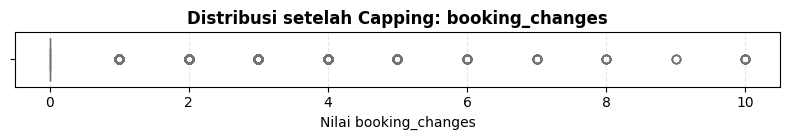

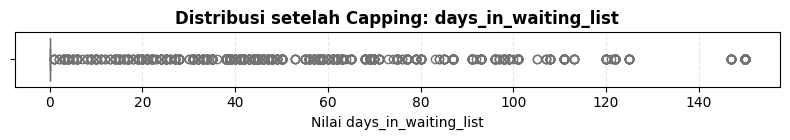

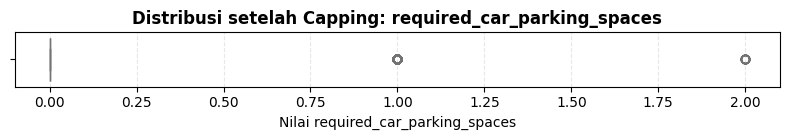

In [57]:
# Visualisasi ulang boxplot setelah capping
for col in capping_rules.keys():
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(x=df_capped[col], color='lightgreen')
    plt.title(f'Distribusi setelah Capping: {col}', fontsize=12, weight='bold')
    plt.xlabel(f'Nilai {col}', fontsize=10)
    plt.grid(True, axis='x', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()


## Bandingkan Sebelum vs Setelah Capping (Opsional)

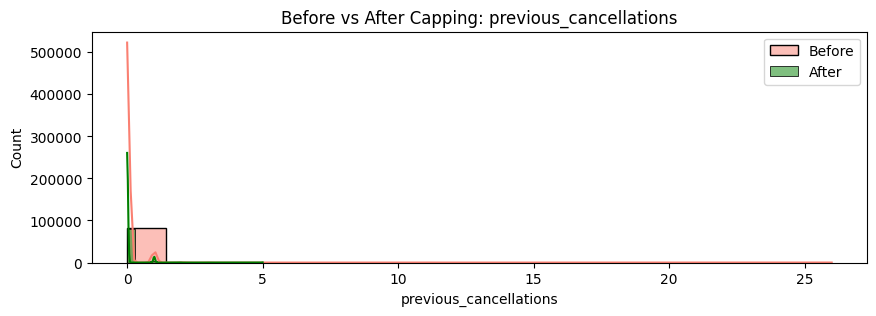

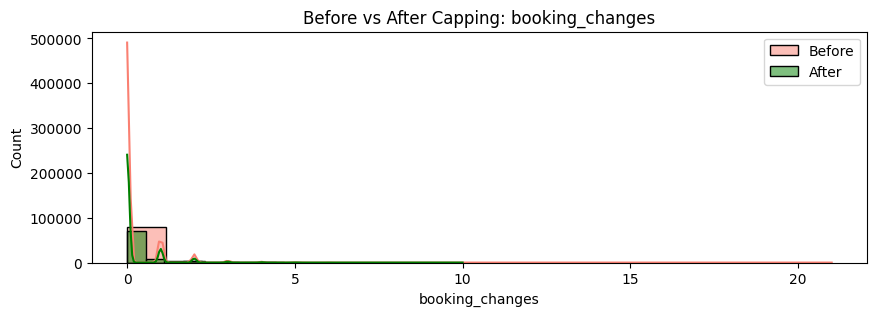

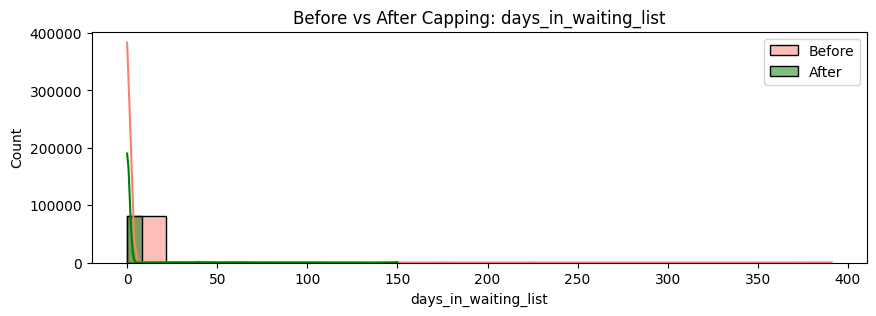

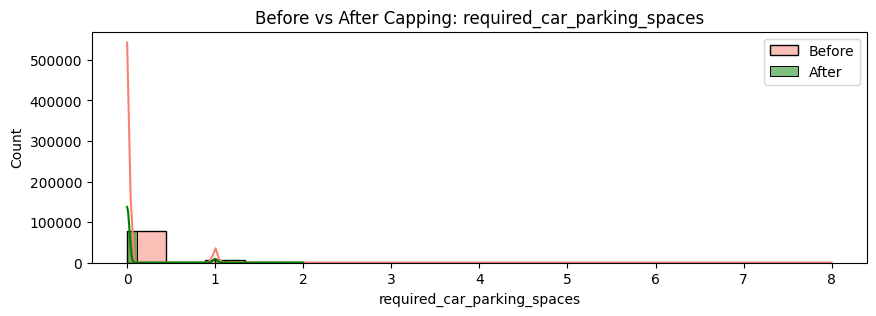

In [58]:
for col in capping_rules.keys():
    plt.figure(figsize=(10, 3))
    sns.histplot(df[col], label='Before', color='salmon', kde=True)
    sns.histplot(df_capped[col], label='After', color='green', kde=True)
    plt.title(f'Before vs After Capping: {col}')
    plt.legend()
    plt.show()


### Interpretasi Capping Fitur Numerik

Proses ini dilakukan untuk membatasi nilai ekstrem (outlier) ke ambang maksimum yang logis berdasarkan konteks bisnis, guna menjaga kestabilan distribusi data tanpa kehilangan informasi penting.

#### Apa yang Dilakukan:

* Duplikat data ke `df_capped` agar data asli tetap utuh.
* Terapkan **rule-based capping** pada 4 fitur numerik:

  * `previous_cancellations` → maksimal 5
  * `booking_changes` → maksimal 10
  * `days_in_waiting_list` → maksimal 150
  * `required_car_parking_spaces` → maksimal 2
* Visualisasikan distribusi **sebelum dan sesudah capping** untuk memastikan dampaknya.

---

### Insight Hasil Capping

* **`previous_cancellations`**:

  * Sebelum capping: distribusi sangat right-skewed.
  * Setelah capping: distribusi lebih terkonsentrasi, nilai ekstrem dikurangi → membantu model fokus pada mayoritas pola umum.

* **`booking_changes`**:

  * Perubahan >10 kali sangat jarang dan tidak wajar secara bisnis.
  * Capping membuat distribusi lebih padat dan tidak "terseret" ke kanan oleh nilai ekstrem.

* **`days_in_waiting_list`**:

  * Capping di 150 hari membuat distribusi lebih realistis.
  * Nilai >150 hari sangat jarang dan bisa dianggap noise.

* **`required_car_parking_spaces`**:

  * Sebelum capping terlihat outlier hingga 8 slot.
  * Setelah capping (maksimal 2 slot) distribusi terlihat jauh lebih bersih dan wajar.

---

### Kesimpulan & Action

* Capping berhasil menstabilkan distribusi fitur numerik tanpa menghapus observasi.
* Mengurangi skewness yang berpotensi mengganggu model terutama pada algoritma distance-based atau sensitive terhadap skala.
* Dataset hasil capping (`df_capped`) siap digunakan untuk tahap selanjutnya: **scaling, encoding, modeling**.

---


# Setelah Capping Outlier

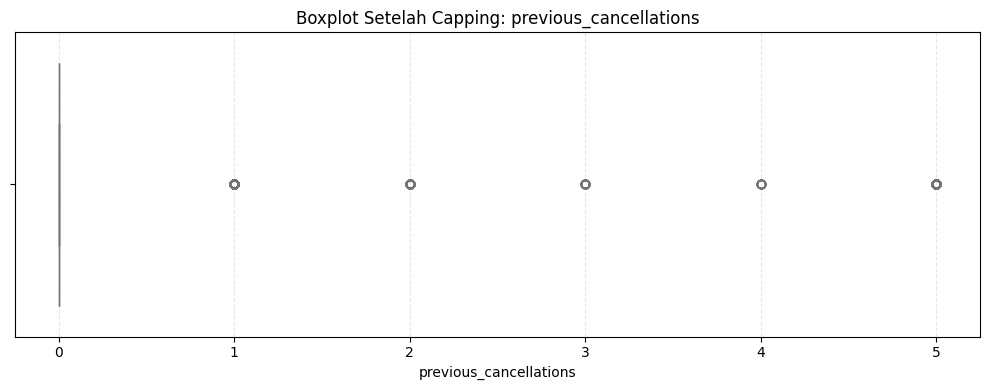

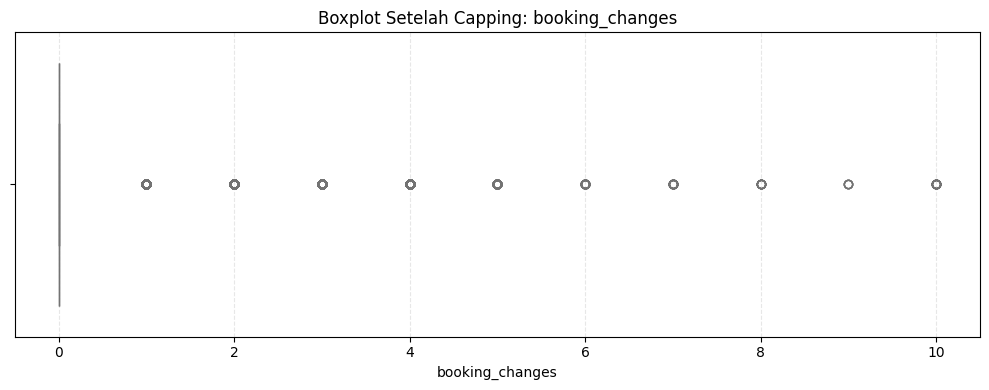

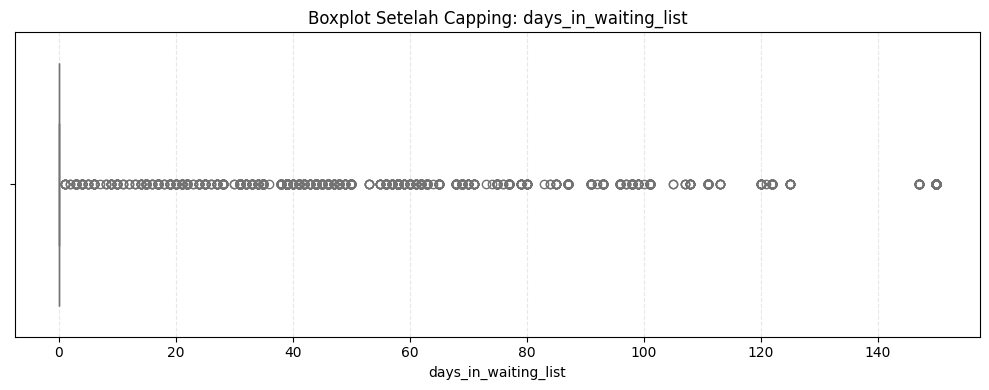

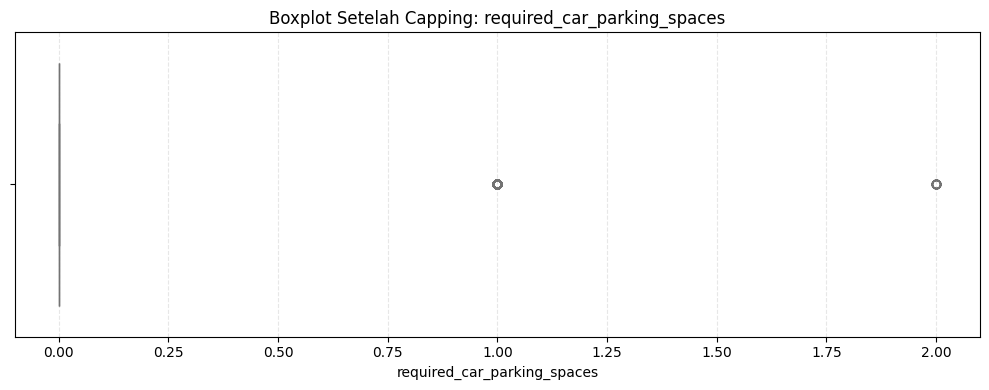

In [59]:
# Cek Ulang Statistik Deskriptif
df_capped.describe().T

# Visualisasi Perbandingan (Optional)
for col in capping_rules.keys():
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df_capped[col], color='lightgreen')
    plt.title(f'Boxplot Setelah Capping: {col}')
    plt.grid(True, axis='x', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

# Definisikan Ulang Dataset Utama
# Gunakan df_capped sebagai data kerja utama
df = df_capped.copy()

# Pisahkan Fitur Numerik & Kategorikal Kembali (untuk persiapan scaling/encoding)
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include='object').columns.tolist()

# Jika ingin treat fitur numerik dengan unique < 15 sebagai kategorikal:
low_card_num = [col for col in numerical_features if df[col].nunique() < 15 and col != 'is_canceled']
categorical_features += low_card_num
numerical_features = [col for col in numerical_features if col not in categorical_features]

# Cek Korelasi Kembali (Optional)
